In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [2]:
# loading the dataset for manipulating 
train1 = pd.read_csv('train-1000-100.csv')
train2 = pd.read_csv('train-100-100.csv')
train3 = pd.read_csv('train-100-10.csv')               
test1 = pd.read_csv('test-1000-100.csv')
test2 = pd.read_csv('test-100-100.csv')
test3 = pd.read_csv('test-100-10.csv')

In [3]:
#showing the shape of the datasets
train1.shape,train2.shape,train3.shape,test1.shape,test2.shape,test3.shape,

((1000, 101), (100, 101), (100, 11), (1000, 101), (1000, 101), (1000, 11))

In [4]:
#column x0 !
x1000 = pd.DataFrame([1] * 1000)
x100 = pd.DataFrame([1] * 100)

In [5]:
#add X0 into the same shape dataframe
train1 = pd.concat([x1000,train1],axis = 1)
train2 = pd.concat([x100,train2],axis = 1)
train3 = pd.concat([x100,train3],axis = 1)
test1 = pd.concat([x1000,test1],axis = 1)
test2 = pd.concat([x1000,test2],axis = 1)
test3 = pd.concat([x1000,test3],axis = 1)

In [6]:
#According the instruction to make the dataset.
df1 = train1.iloc[0:50,:]
df2 = train1.iloc[0:100,:]
df3 = train1.iloc[0:150,:]

**Q1**

In [7]:
#define function for 1.1, using for 101 columns dataframe: 1 & 2
def get_best_lamda(xtrain,ytrain,xtest,ytest,lamda_ = 151):
    w_list = []
    MSE_train = []
    MSE_test = []
    for number in range(lamda_):
        w = np.dot(np.linalg.inv(xtrain.T.dot(xtrain) + number*np.eye(xtrain.shape[1])),xtrain.T).dot(ytrain)
        mse_train = ((xtrain.dot(w) - ytrain)**2).mean()
        MSE_train.append(mse_train)
        mse_test = ((xtest.dot(w) - ytest)**2).mean()
        MSE_test.append(mse_test)
        w_list.append(w)
    print('MSE_train is :{}'.format(min(MSE_train)))
    print('MSE_test is :{}'.format(min(MSE_test)))
    print('the best λ for the dataset is :{}'.format(MSE_train.index(min(MSE_train))))
    print('the best λ for the dataset is :{}'.format(MSE_test.index(min(MSE_test))))

In [8]:
#Q1.1 
#1000-100
Xtrain1 = train1.drop('y', axis = 1).values
ytrain1 = train1['y'].values.reshape(-1,1)
Xtest1 = test1.drop('y', axis = 1).values
ytest1 = test1['y'].values.reshape(-1,1)

#100-100
Xtrain2 = train2.drop('y', axis = 1).values
ytrain2 = train2['y'].values.reshape(-1,1)
Xtest2 = test2.drop('y', axis = 1).values
ytest2 = test2['y'].values.reshape(-1,1)

#100-10
Xtrain3 = train3.drop('y', axis = 1).values
ytrain3 = train3['y'].values.reshape(-1,1)
Xtest3 = test3.drop('y', axis = 1).values
ytest3 = test3['y'].values.reshape(-1,1)


In [9]:
get_best_lamda(Xtrain1,ytrain1,Xtest1,ytest1,)

MSE_train is :5.210034703130466
MSE_test is :6.389138883301878
the best λ for the dataset is :0
the best λ for the dataset is :45


In [10]:
get_best_lamda(Xtrain2,ytrain2,Xtest2,ytest2,)

MSE_train is :0.46930018051647693
MSE_test is :6.965437997045911
the best λ for the dataset is :1
the best λ for the dataset is :24


In [11]:
get_best_lamda(Xtrain3,ytrain3,Xtest3,ytest3,)

MSE_train is :5.450043520977647
MSE_test is :6.258031077165362
the best λ for the dataset is :0
the best λ for the dataset is :9


**Q1.2**

In [12]:
#define function for getting the set of MSE 
def get_MSE_set(xtrain,ytrain,xtest,ytest,lamda_ = 151):
    w_list = []
    MSE_train = []
    MSE_test = []
    for number in range(lamda_):
        w = np.dot(np.linalg.inv(xtrain.T.dot(xtrain) + number*np.eye(xtrain.shape[1])),xtrain.T).dot(ytrain)
        mse_train = ((xtrain.dot(w) - ytrain)**2).mean()
        MSE_train.append(mse_train)
        mse_test = ((xtest.dot(w) - ytest)**2).mean()
        MSE_test.append(mse_test)
        w_list.append(w)
    return MSE_train,MSE_test
    

In [13]:
# for df1, df2, df3 trainging data 
Xr1 = df1.drop('y', axis = 1).values
yr1 = df1['y'].values.reshape(-1,1)
Xtest1 = test1.drop('y', axis = 1).values
ytest1 = test1['y'].values.reshape(-1,1)

Xr2 = df2.drop('y', axis = 1).values
yr2 = df2['y'].values.reshape(-1,1)
Xtest1 = test1.drop('y', axis = 1).values
ytest1 = test1['y'].values.reshape(-1,1)

Xr3 = df3.drop('y', axis = 1).values
yr3 = df3['y'].values.reshape(-1,1)
Xtest1 = test1.drop('y', axis = 1).values
ytest1 = test1['y'].values.reshape(-1,1)


In [14]:
#df1
train_1,test_1 = get_MSE_set(Xr1,yr1,Xtest1,ytest1,)
#df2
train_2,test_2 = get_MSE_set(Xr2,yr2,Xtest1,ytest1,)
#df3
train_3,test_3 = get_MSE_set(Xr3,yr3,Xtest1,ytest1,)
lam = np.array(range(0,151))

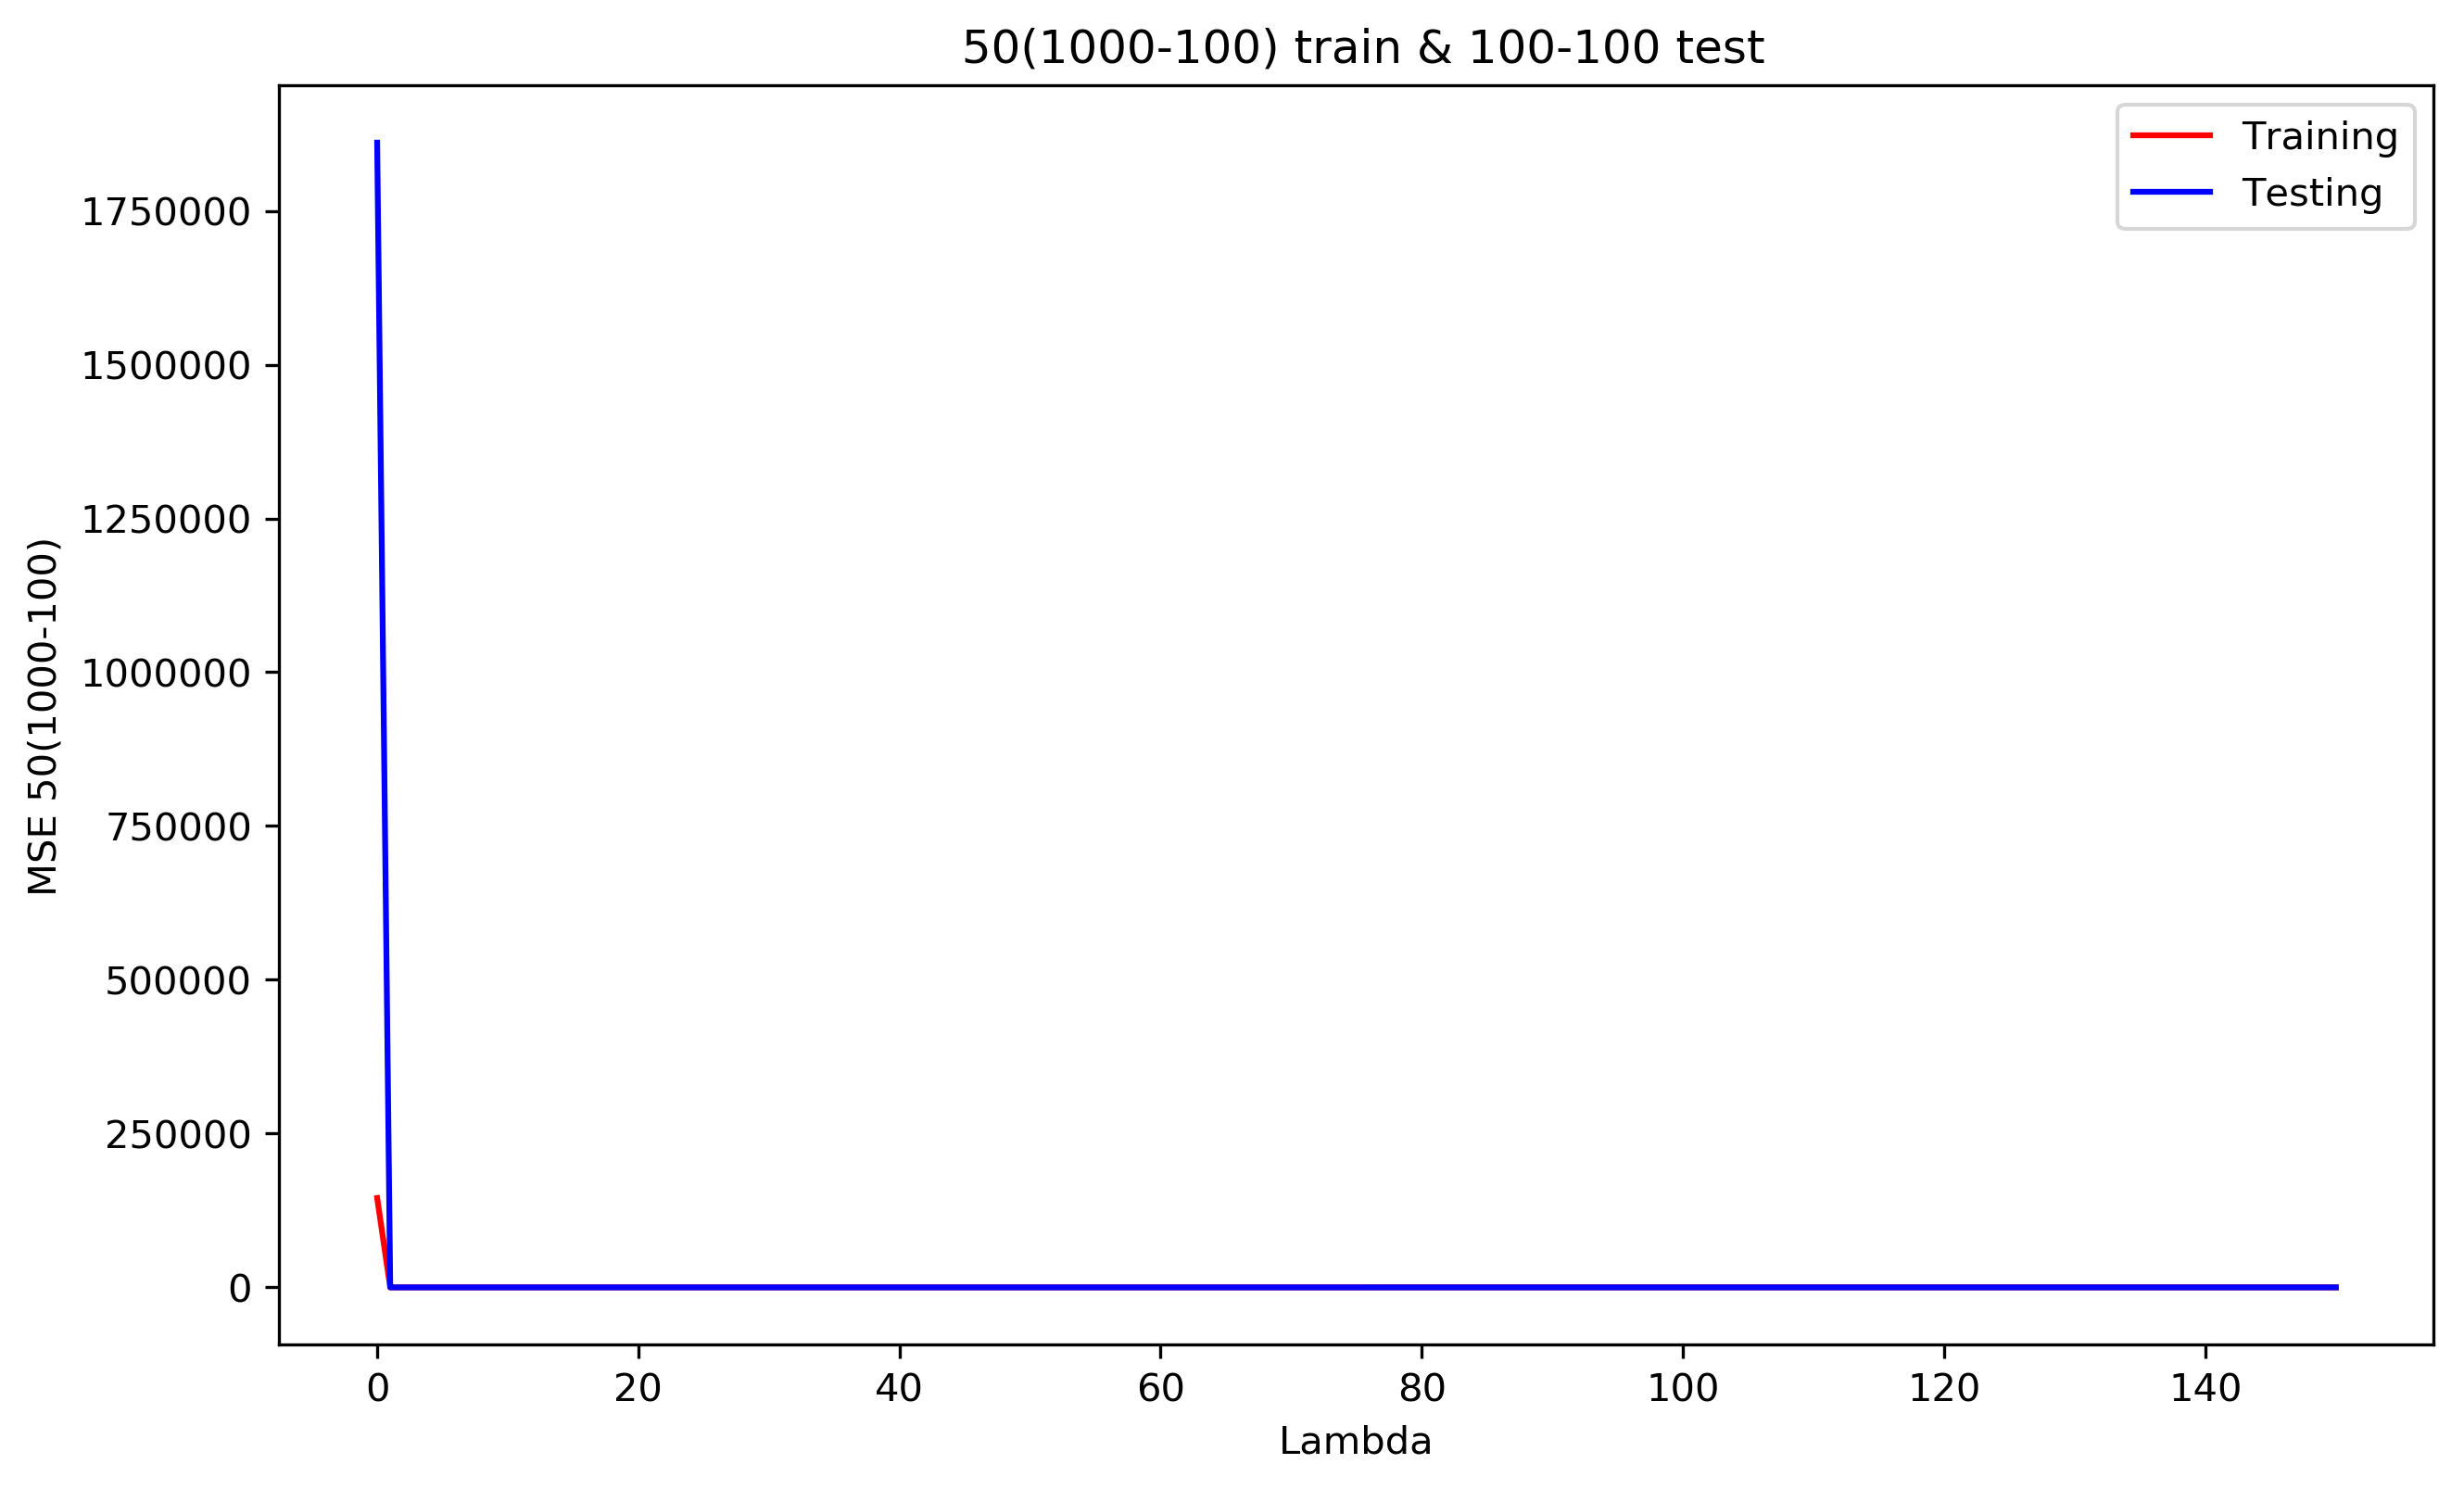

In [15]:
sns.set_style()
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,train_1, color = 'r',label = 'Training')
plt.plot(lam,test_1, color = 'b',label = 'Testing')
plt.title(' 50(1000-100) train & 100-100 test')
plt.xlabel('Lambda')
plt.ylabel('MSE 50(1000-100)')
plt.legend()
plt.show()

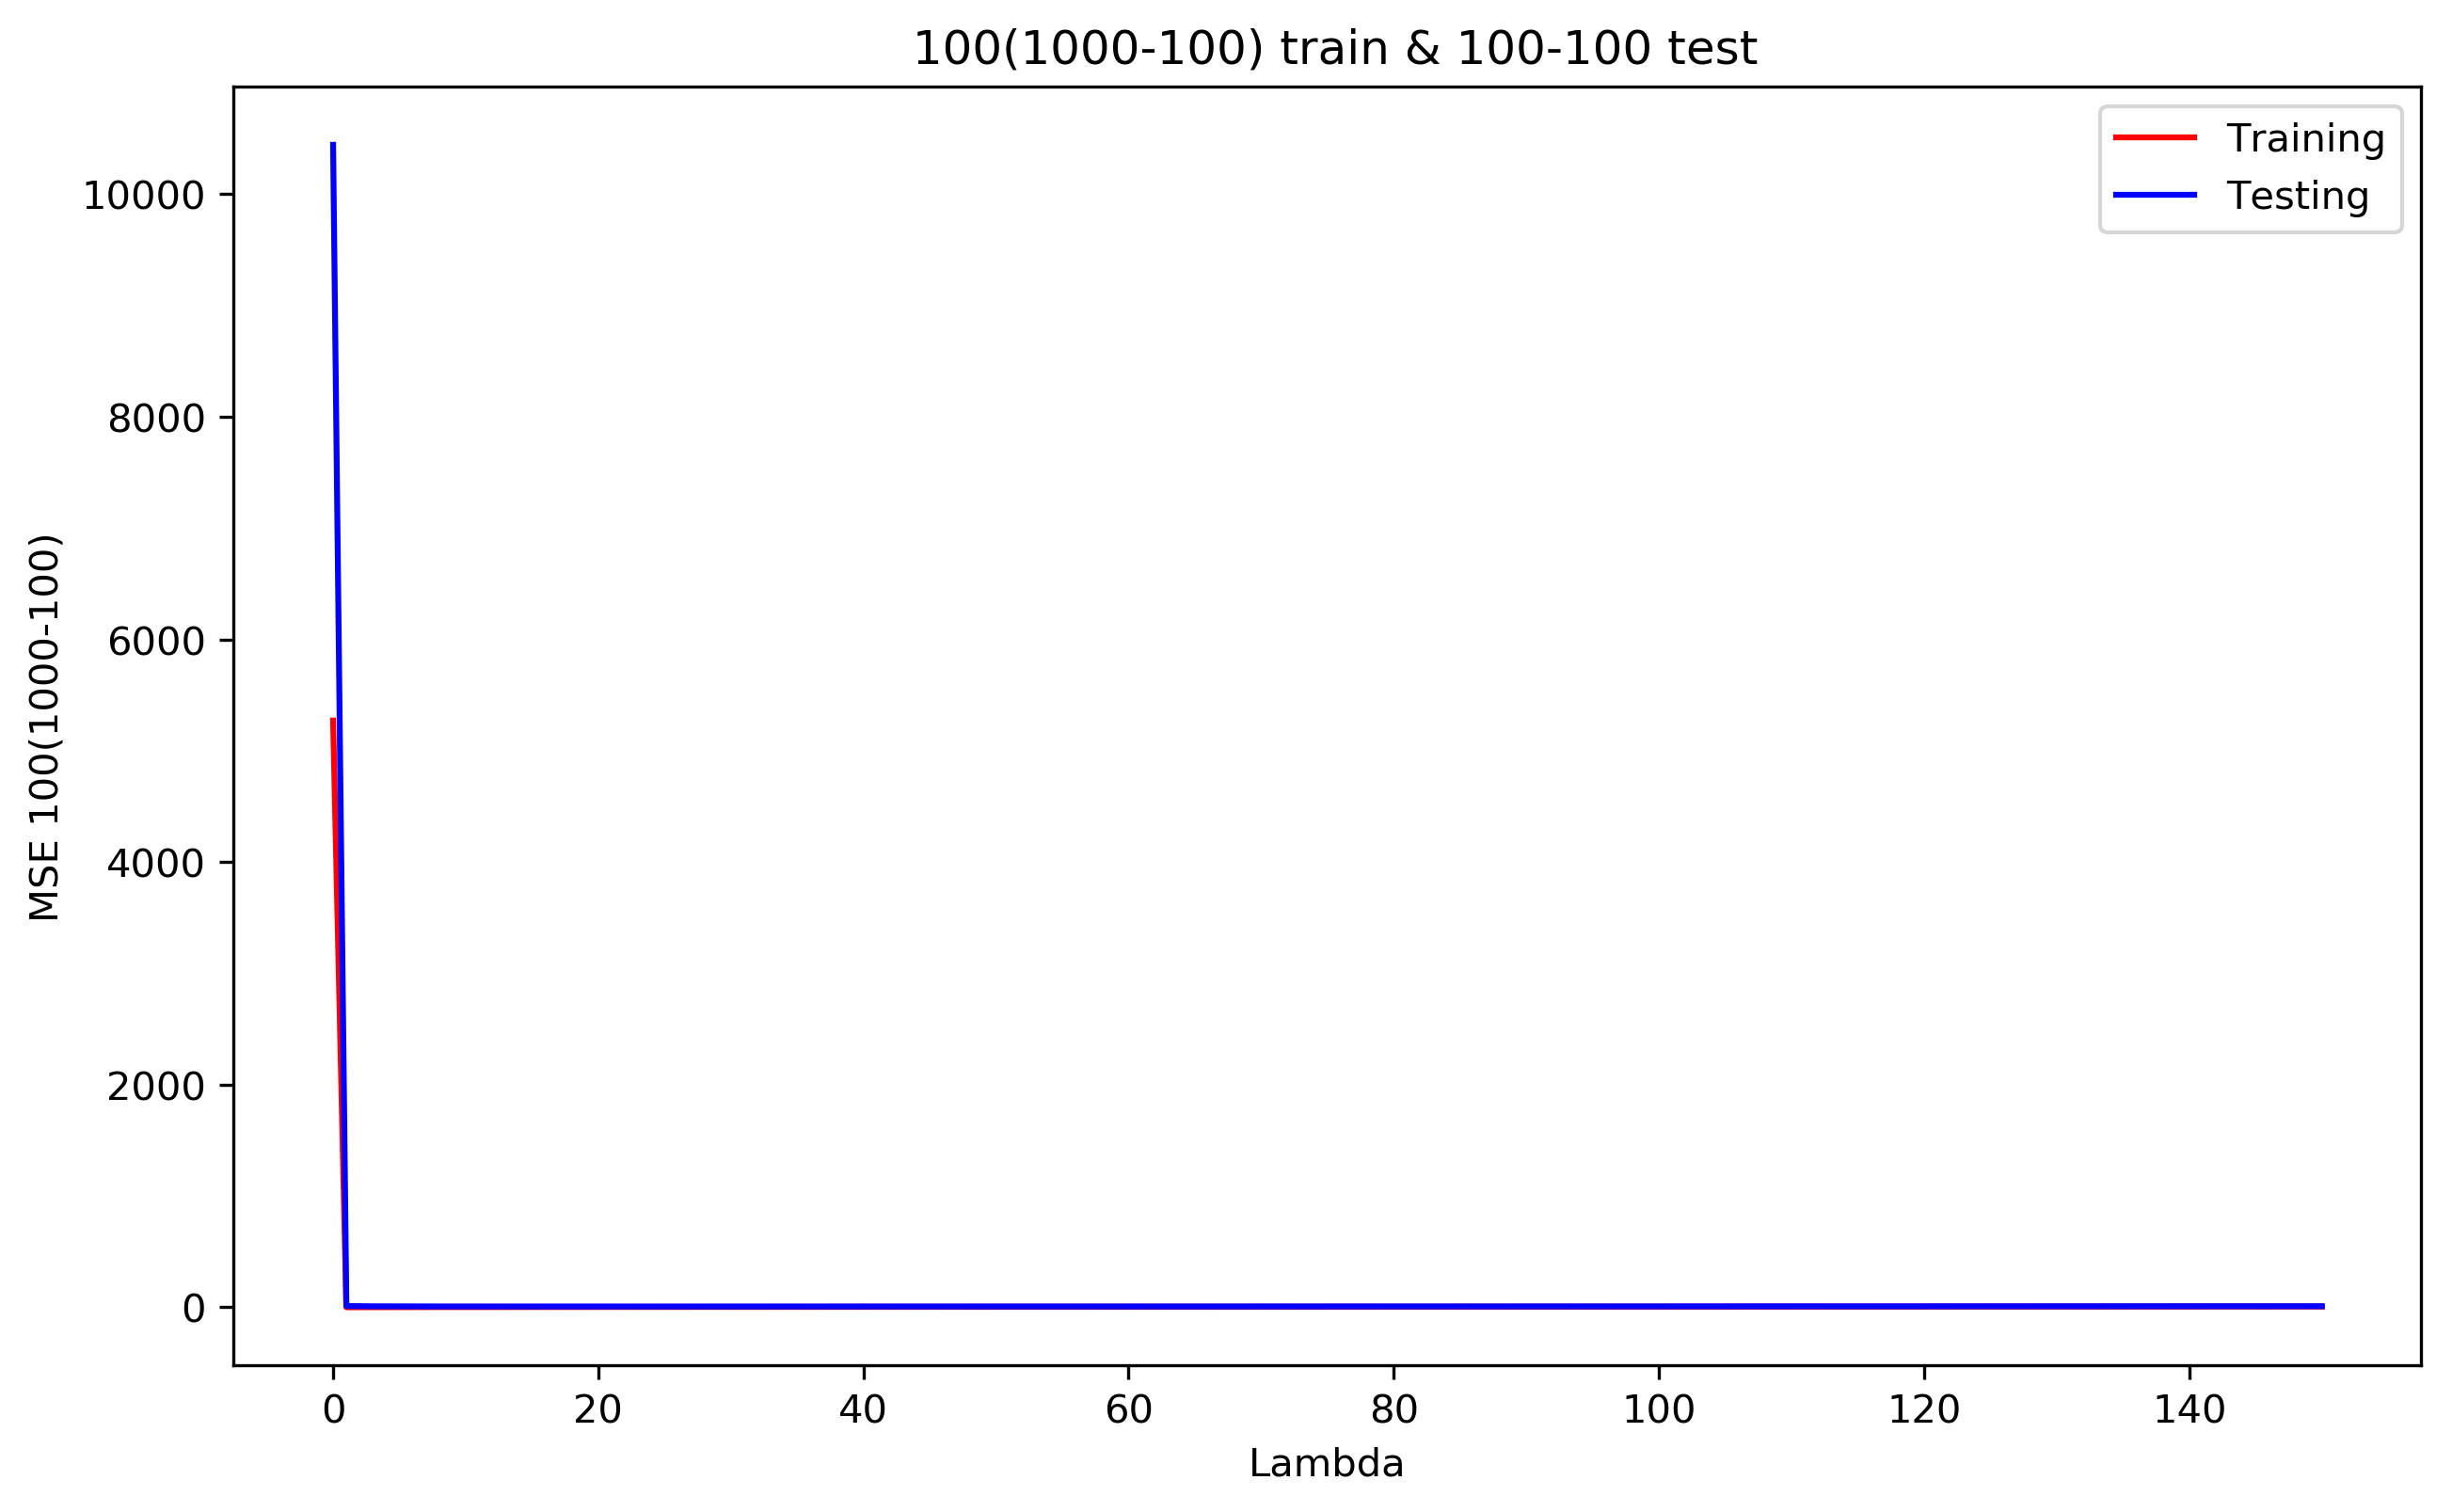

In [16]:
sns.set_style()
plt.figure(figsize = (10,6),dpi=300)
plt.plot(lam,train_2, color = 'r',label = 'Training')
plt.plot(lam,test_2, color = 'b',label = 'Testing')
plt.title(' 100(1000-100) train & 100-100 test')
plt.xlabel('Lambda')
plt.ylabel('MSE 100(1000-100)')
plt.legend()
plt.show()

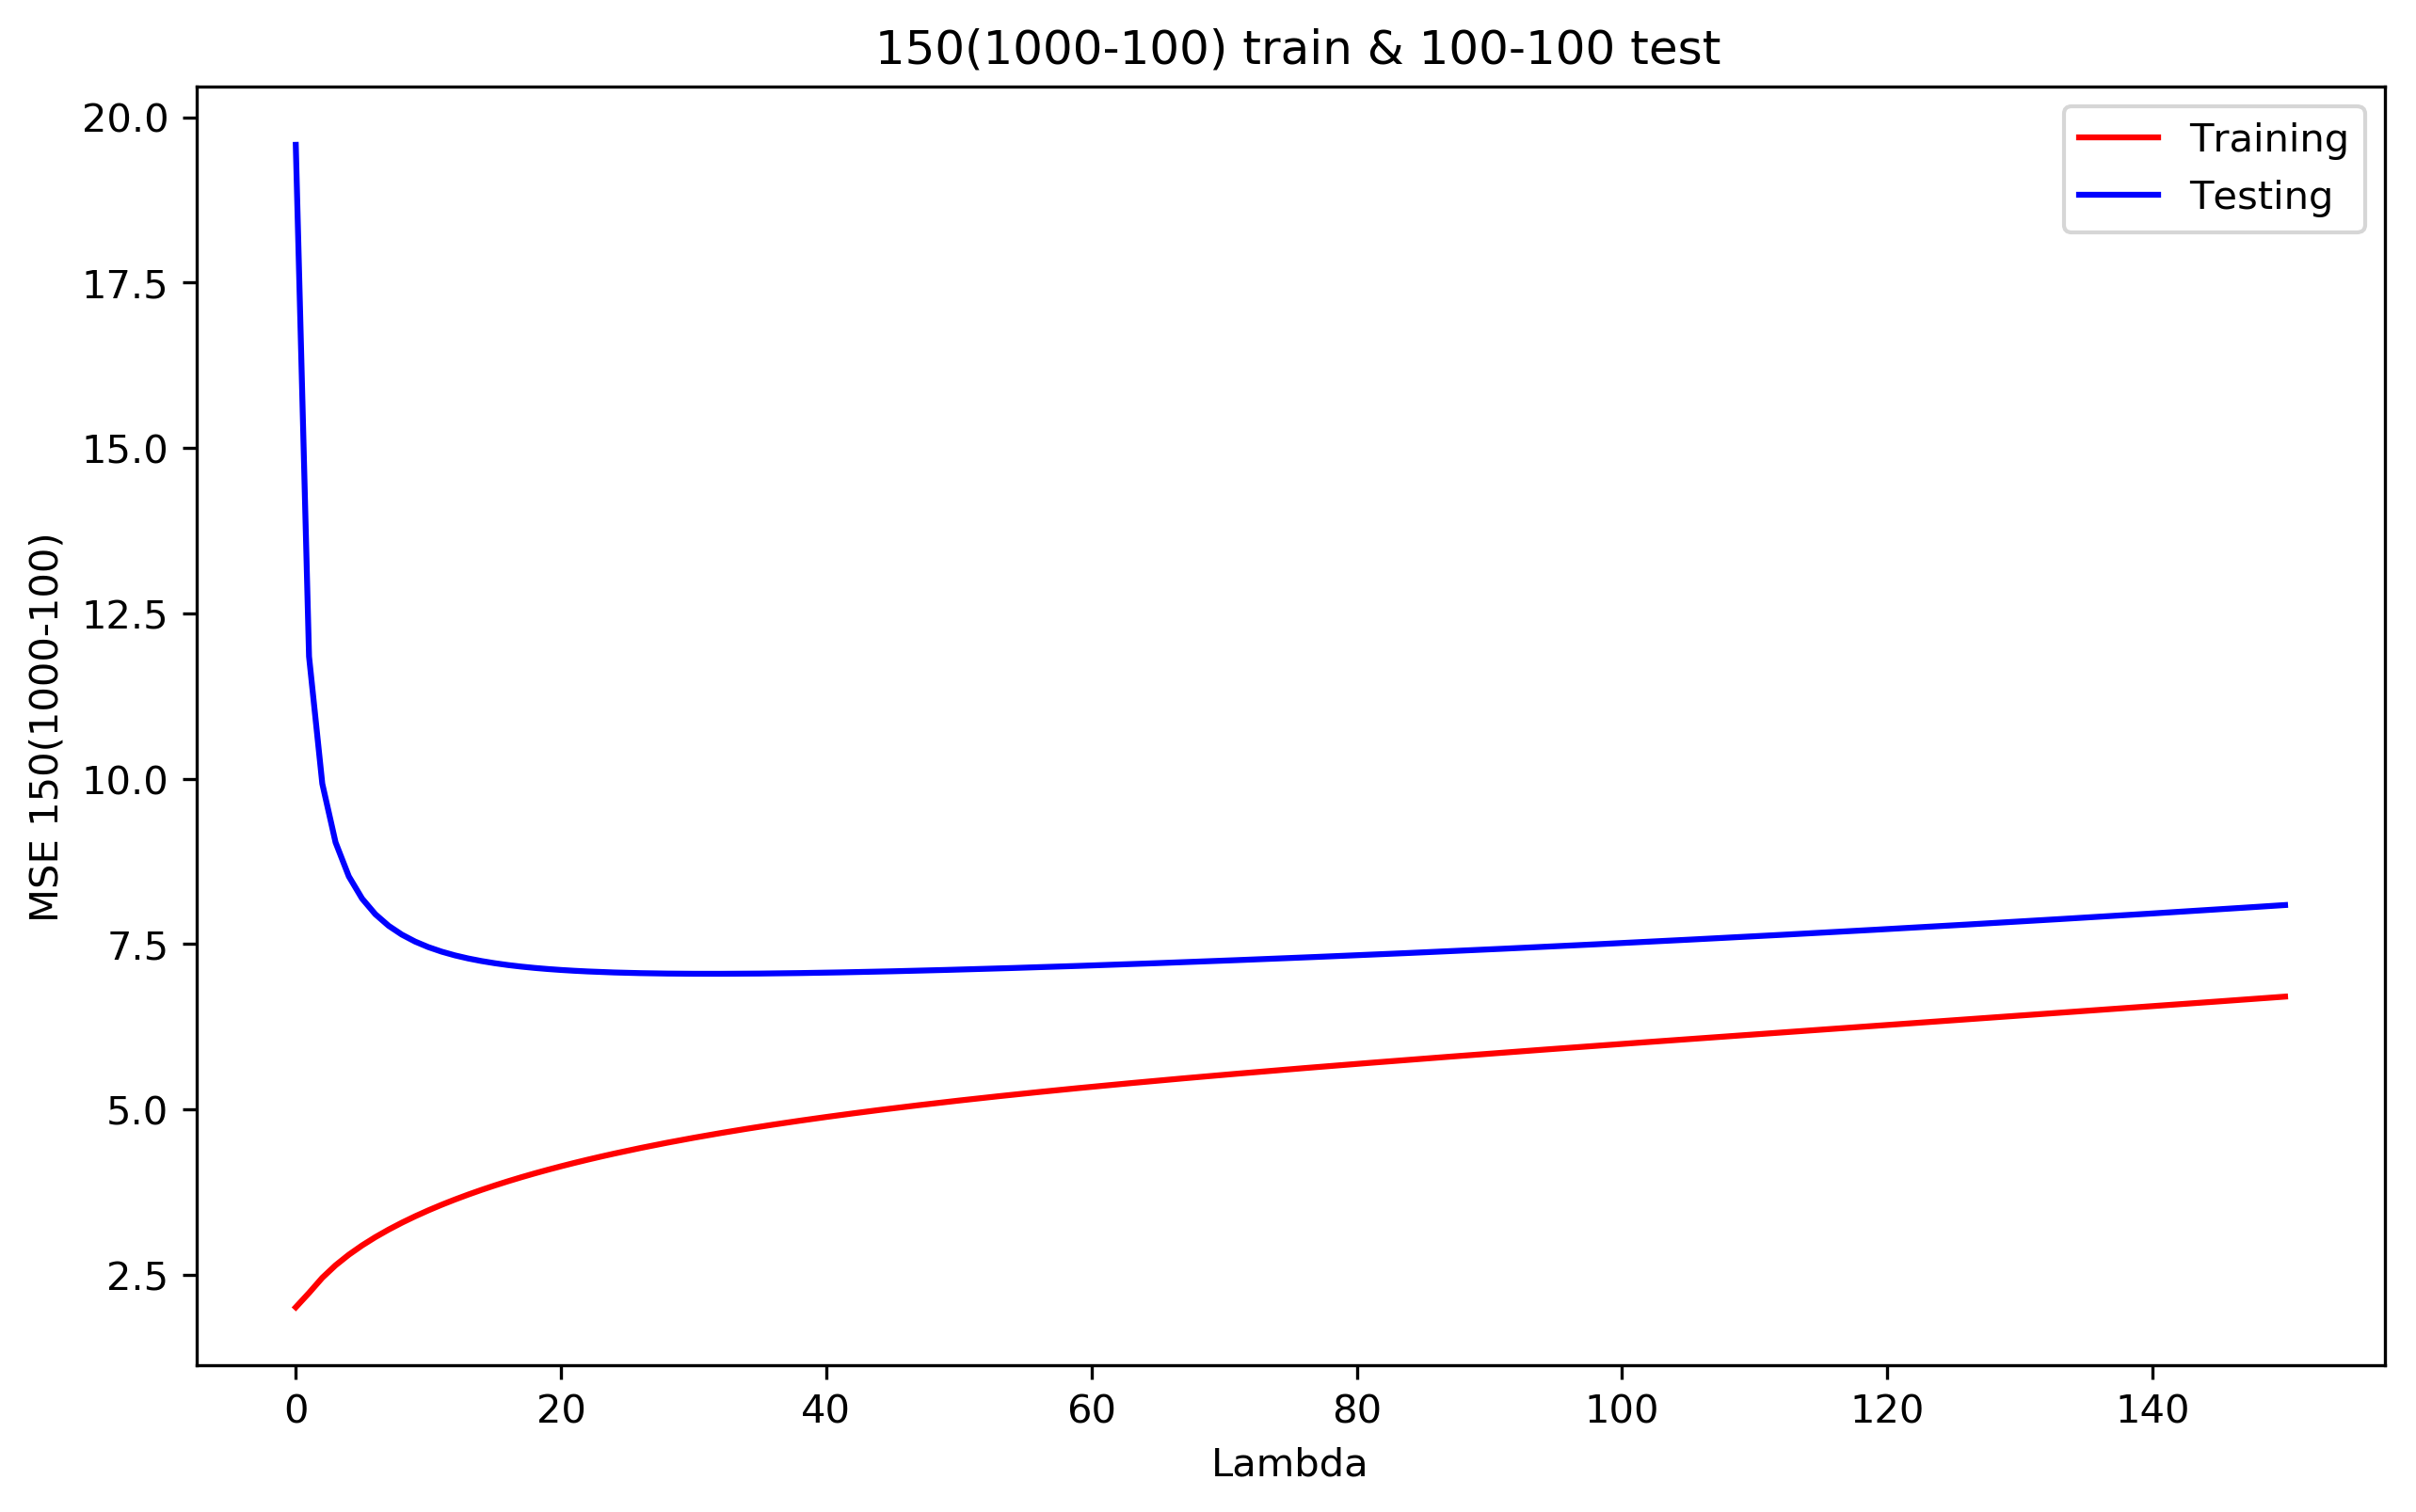

In [17]:
sns.set_style()
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,train_3, color = 'r',label = 'Training')
plt.plot(lam,test_3, color = 'b',label = 'Testing')
plt.title(' 150(1000-100) train & 100-100 test')
plt.xlabel('Lambda')
plt.ylabel('MSE 150(1000-100)')
plt.legend()
plt.show()

**Q2**

In [18]:
#define function for getting the set of MSE 
def get_kMSE_set(xtrain,ytrain,xtest,ytest,lam,k_n = 10):
    w_list = []
    MSE_train = []
    MSE_test = []
    for i in range(k_n):
        w = np.dot(np.linalg.inv(xtrain[i].T.dot(xtrain[i]) + lam*np.eye(xtrain[i].shape[1])),xtrain[i].T).dot(ytrain[i])
        mse_train = ((xtrain[i].dot(w) - ytrain[i])**2).mean()
        MSE_train.append(mse_train)
        mse_test = ((xtest[i].dot(w) - ytest[i])**2).mean()
        MSE_test.append(mse_test)
        
    return np.mean(MSE_train),np.mean(MSE_test)

In [19]:
def get_kfold_mse(x,lamda_ = 151,n = 10):
    kf = KFold(n_splits = n)
    kf.get_n_splits(x)
    train_x1 = []
    test_x1 = []
    train_y1 = []
    test_y1 = []
    for train_index, test_index in kf.split(x):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train = x.drop('y', axis = 1).values
        y_train = x['y'].values.reshape(-1,1)
        X_traink, X_testk = X_train[train_index], X_train[test_index]
        y_traink, y_testk = y_train[train_index], y_train[test_index]
        train_x1.append(X_traink)
        test_x1.append(X_testk)
        train_y1.append(y_traink)
        test_y1.append(y_testk)
    MSE_traink = []
    MSE_testk = []
    for l in range(lamda_):
        train,test = get_kMSE_set(train_x1,train_y1,test_x1,test_y1,lam = l,)
        MSE_traink.append(train)
        MSE_testk.append(test)
    return MSE_traink,MSE_testk

MSE_train is :5.138559832509903
MSE_test is :6.264589357605778
the best λ for training in 1000-100 train set is :0
the best λ for testing in 1000-100 train set is :59


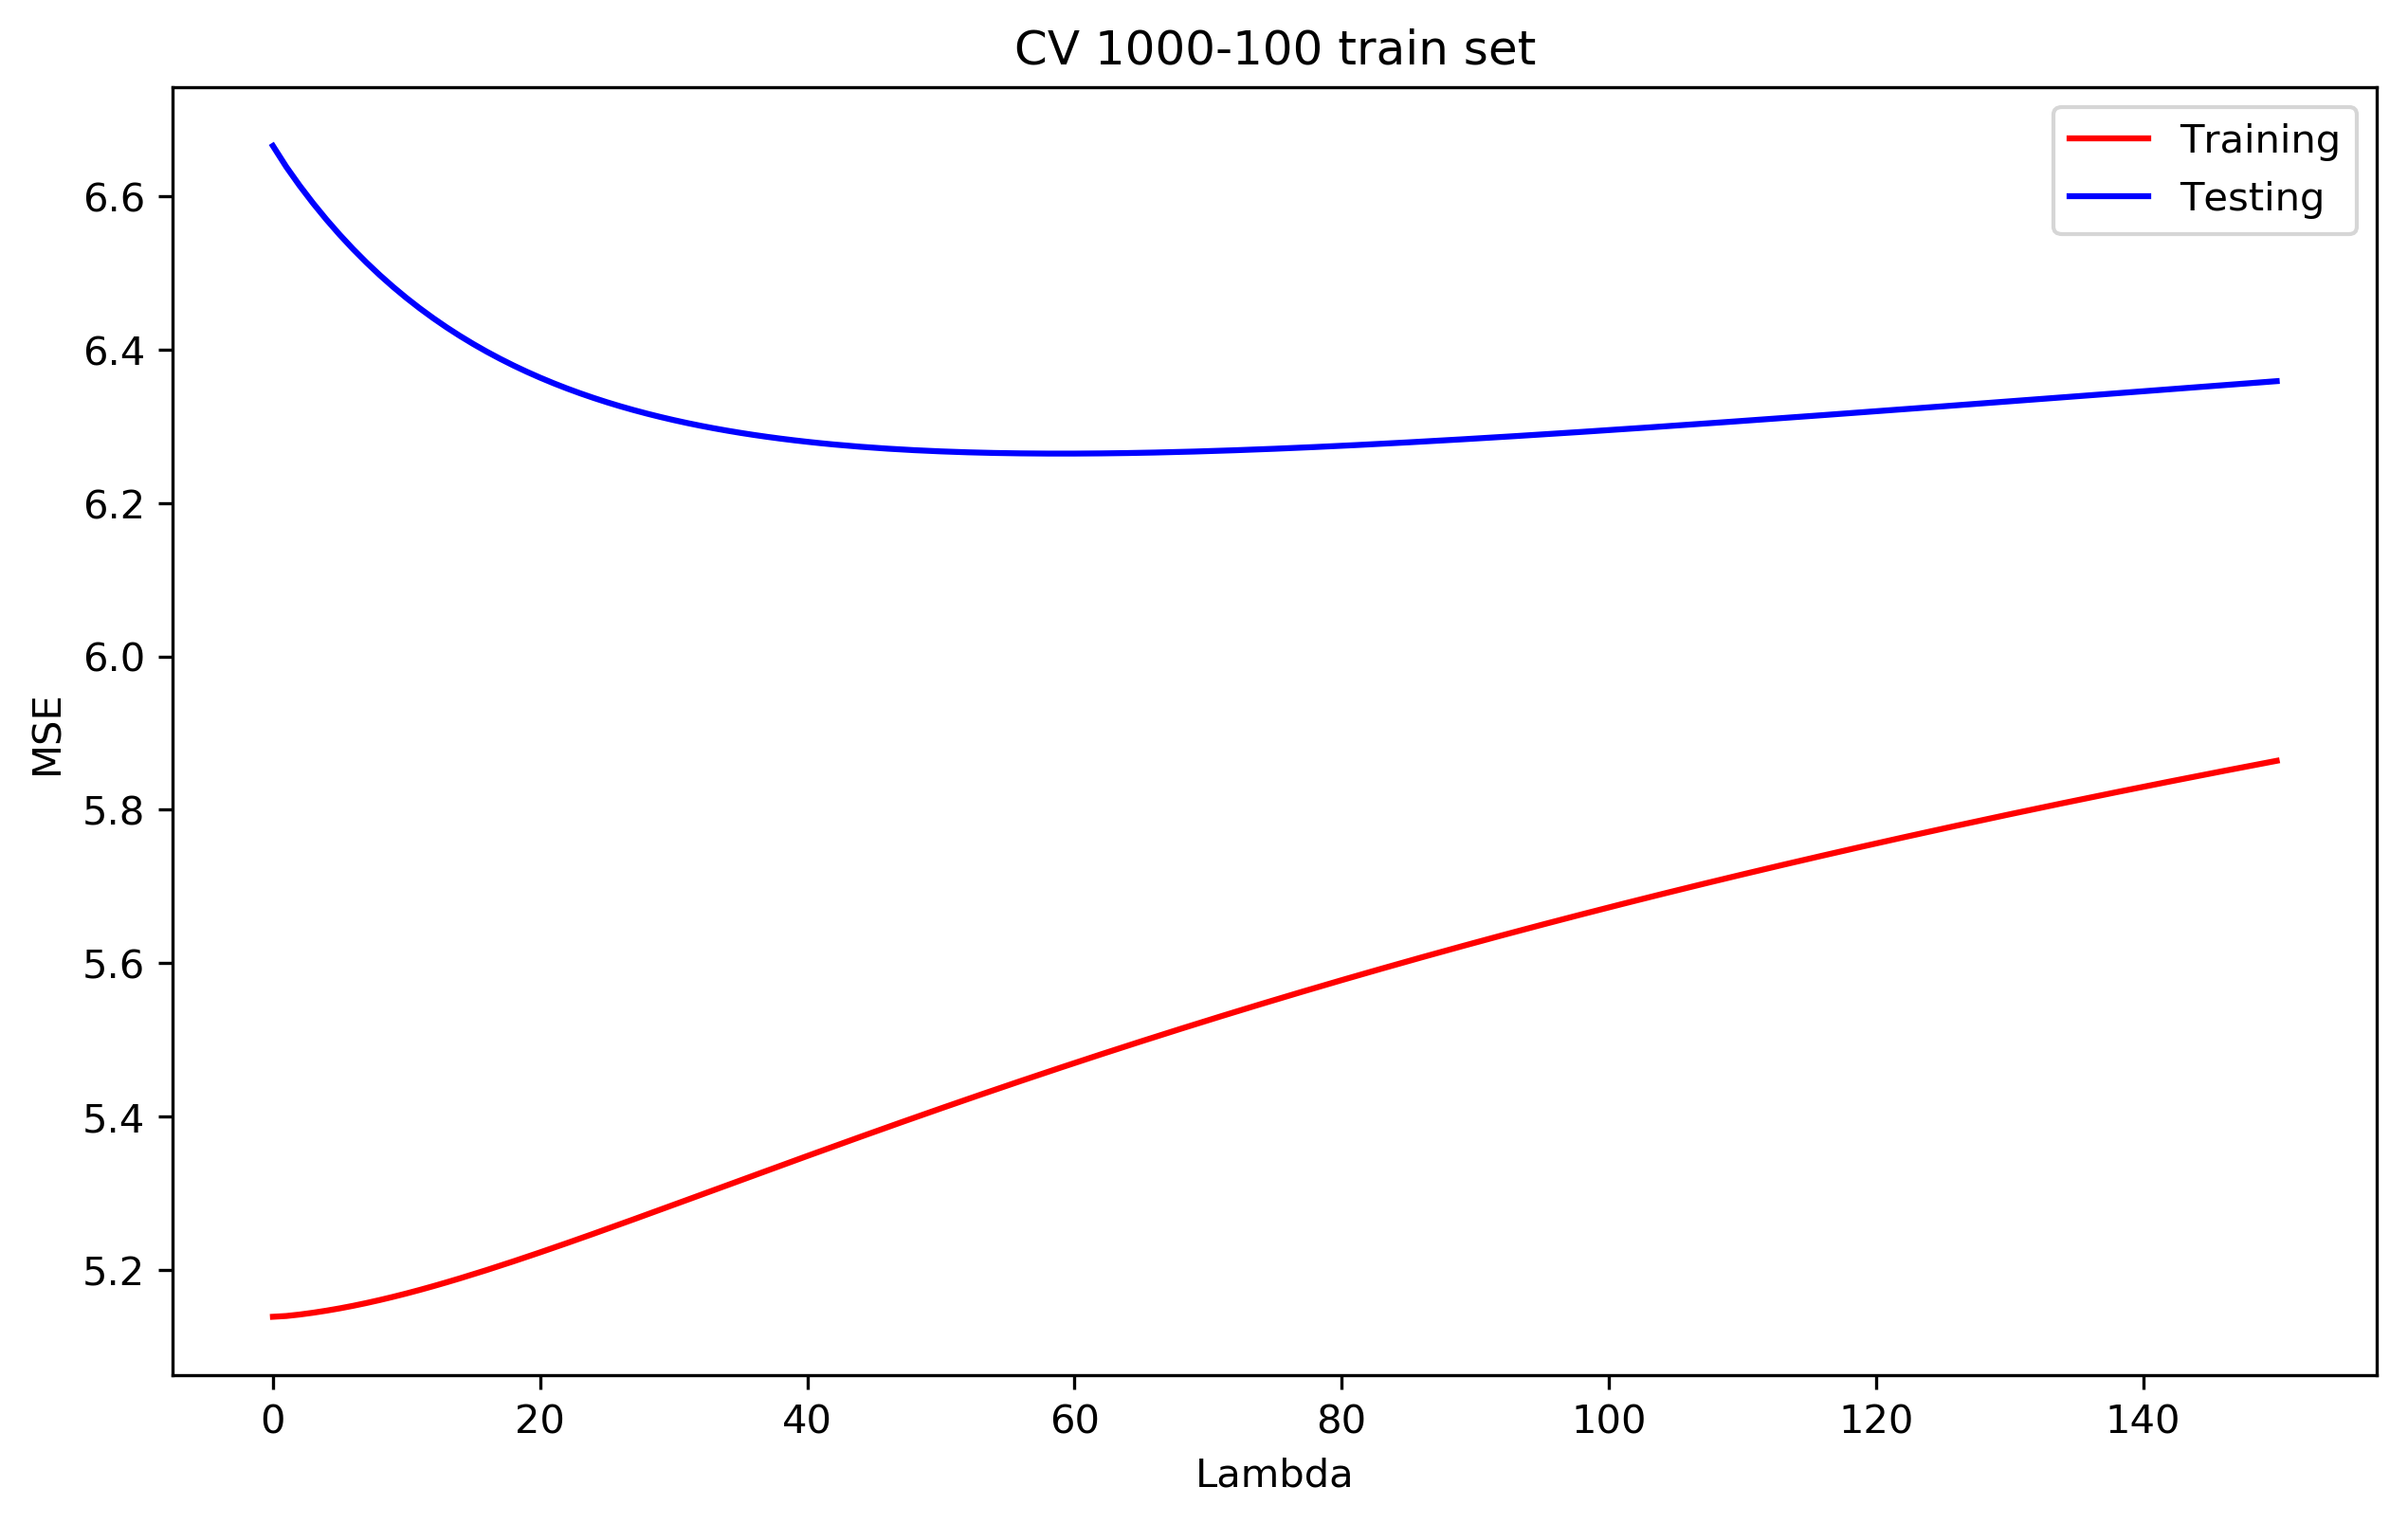

In [20]:
#set 1
cv_train1,cv_test1 = get_kfold_mse(train1,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train1)))
print('MSE_test is :{}'.format(min(cv_test1)))
print('the best λ for training in 1000-100 train set is :{}'.format(cv_train1.index(min(cv_train1))))
print('the best λ for testing in 1000-100 train set is :{}'.format(cv_test1.index(min(cv_test1))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train1, color = 'r', label = 'Training')
plt.plot(lam,cv_test1, color = 'b', label = 'Testing')
plt.title('CV 1000-100 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE_train is :5.138559832509903
MSE_test is :6.264589357605778
the best λ for training in 100-100 train set is :1
the best λ for testing in 100-100 train set is :11


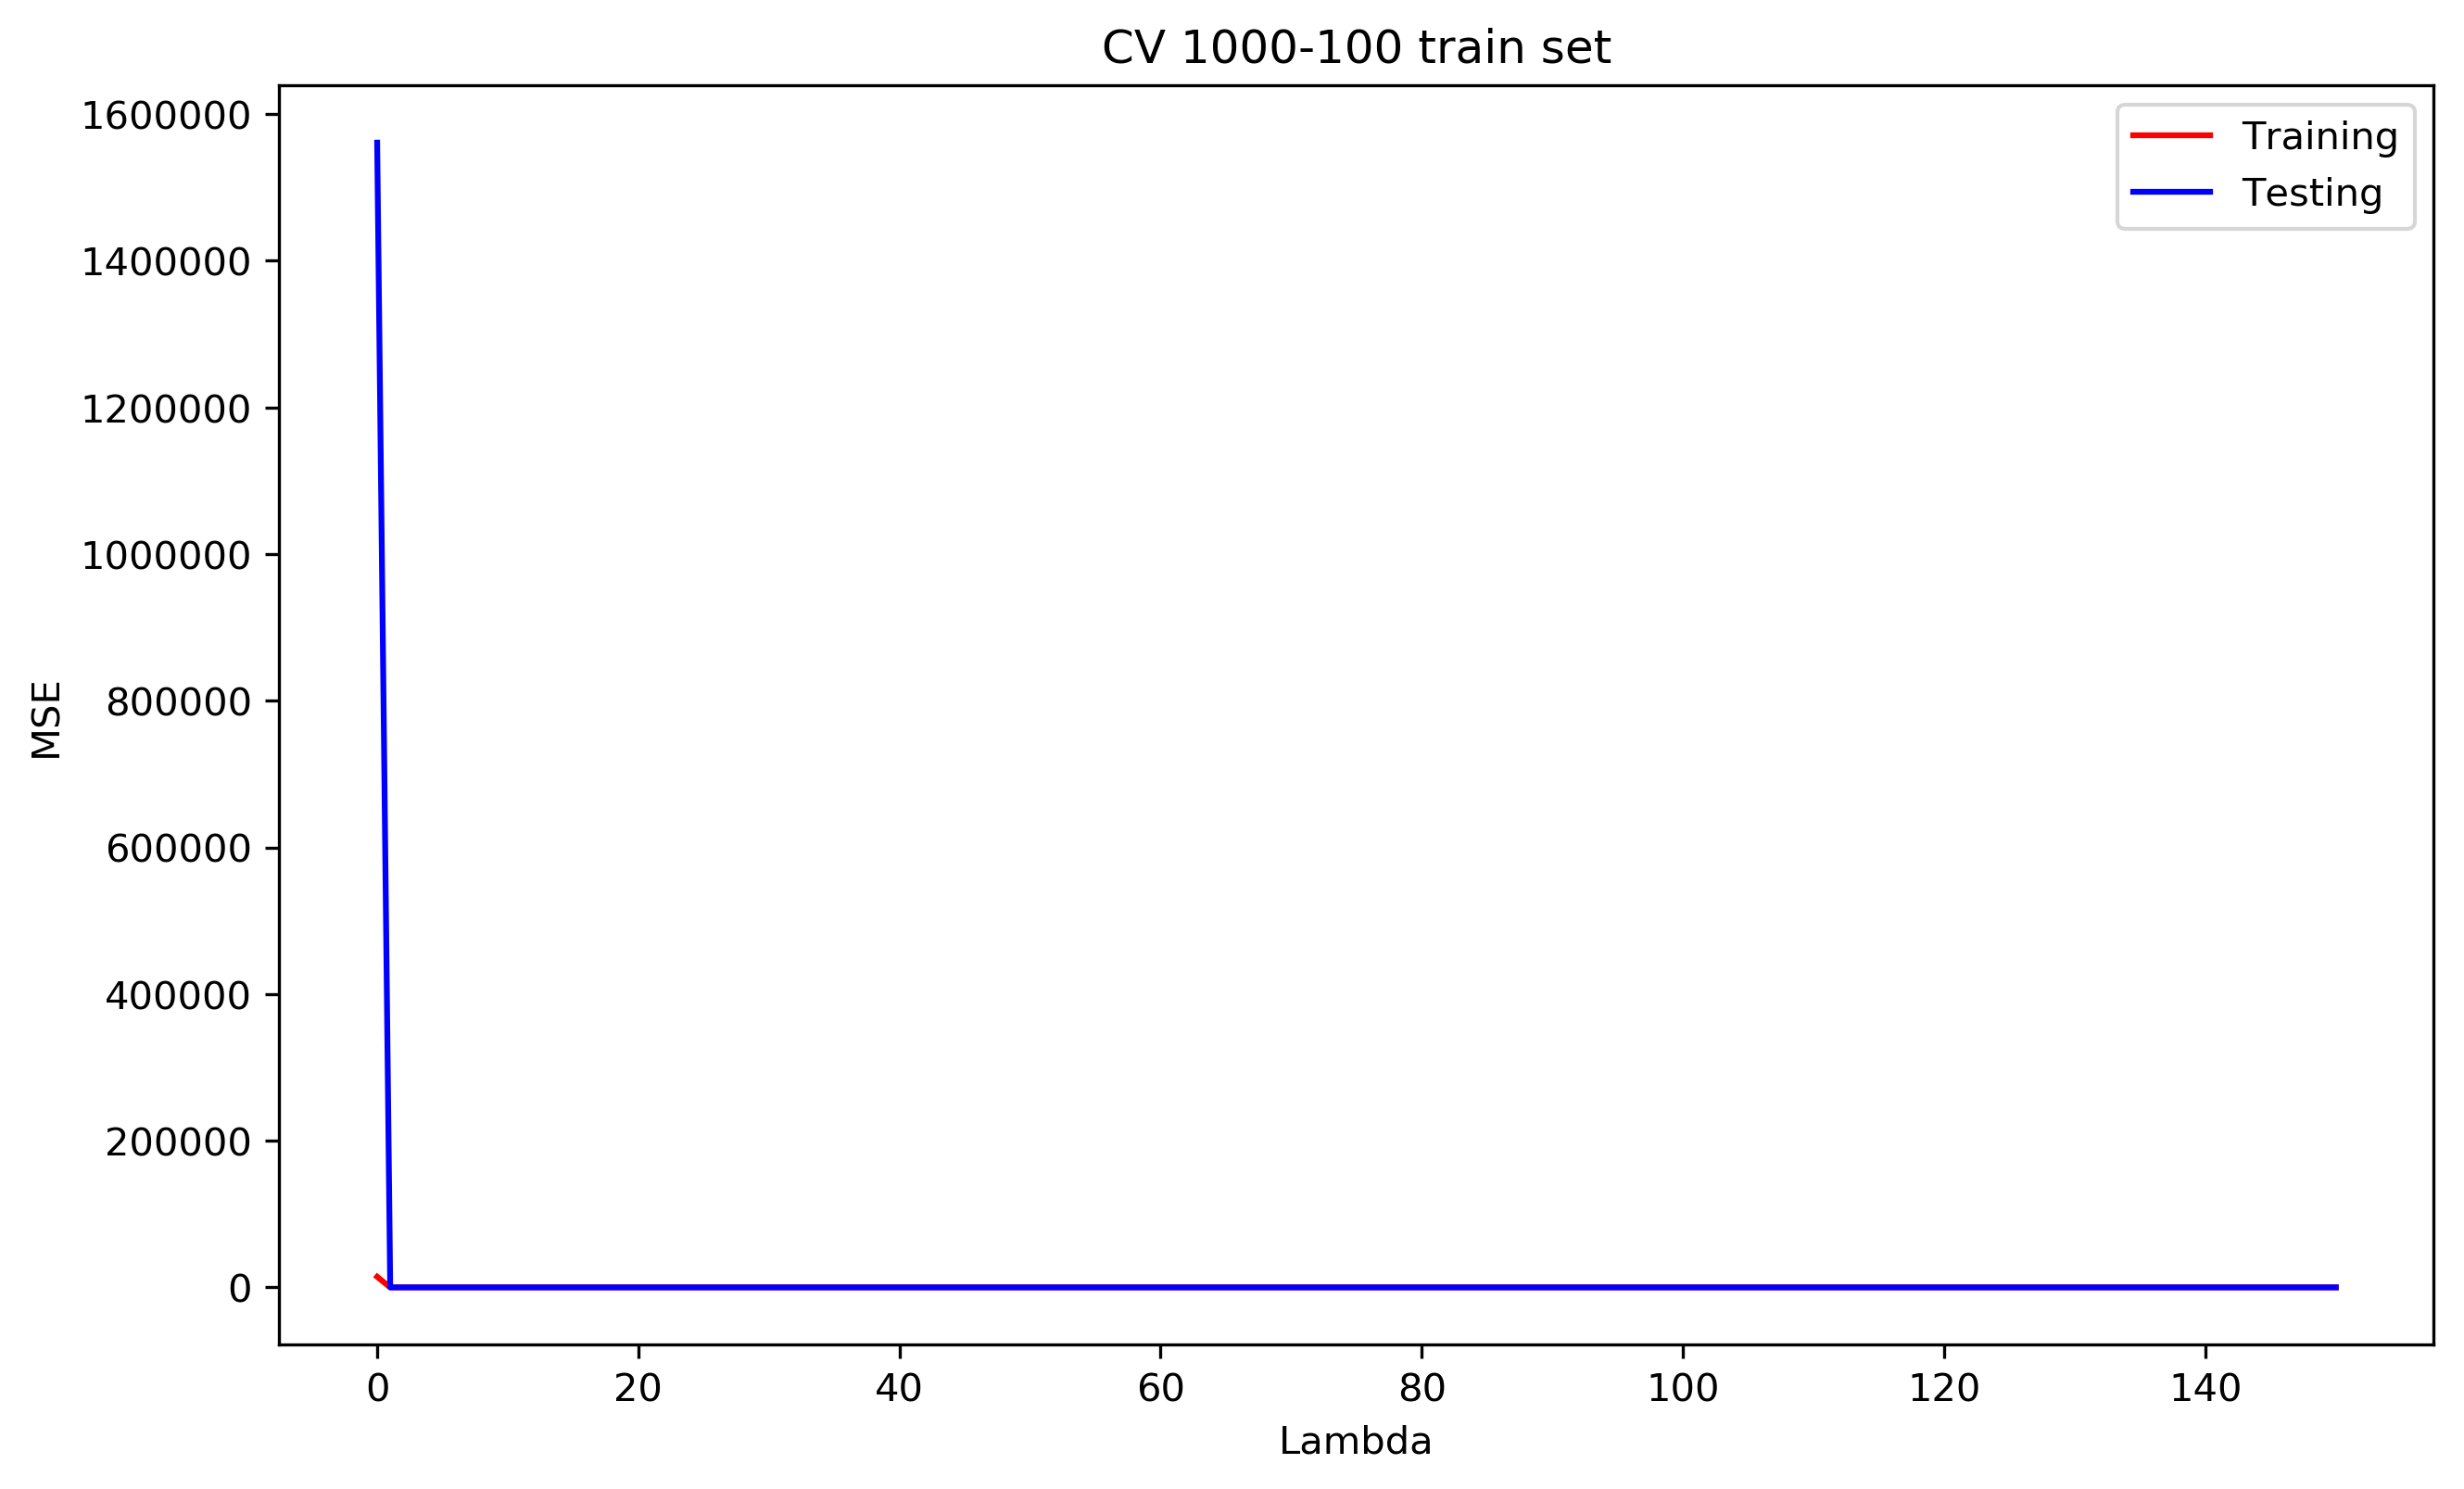

In [21]:
#set 2
cv_train2,cv_test2 = get_kfold_mse(train2,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train1)))
print('MSE_test is :{}'.format(min(cv_test1)))
print('the best λ for training in 100-100 train set is :{}'.format(cv_train2.index(min(cv_train2))))
print('the best λ for testing in 100-100 train set is :{}'.format(cv_test2.index(min(cv_test2))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train2, color = 'r', label = 'Training')
plt.plot(lam,cv_test2, color = 'b', label = 'Testing')
plt.title('CV 1000-100 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE_train is :5.3730830483640135
MSE_test is :6.266134803089716
the best λ for training in 100-10 train set is :0
the best λ for testing in 100-10 train set is :11


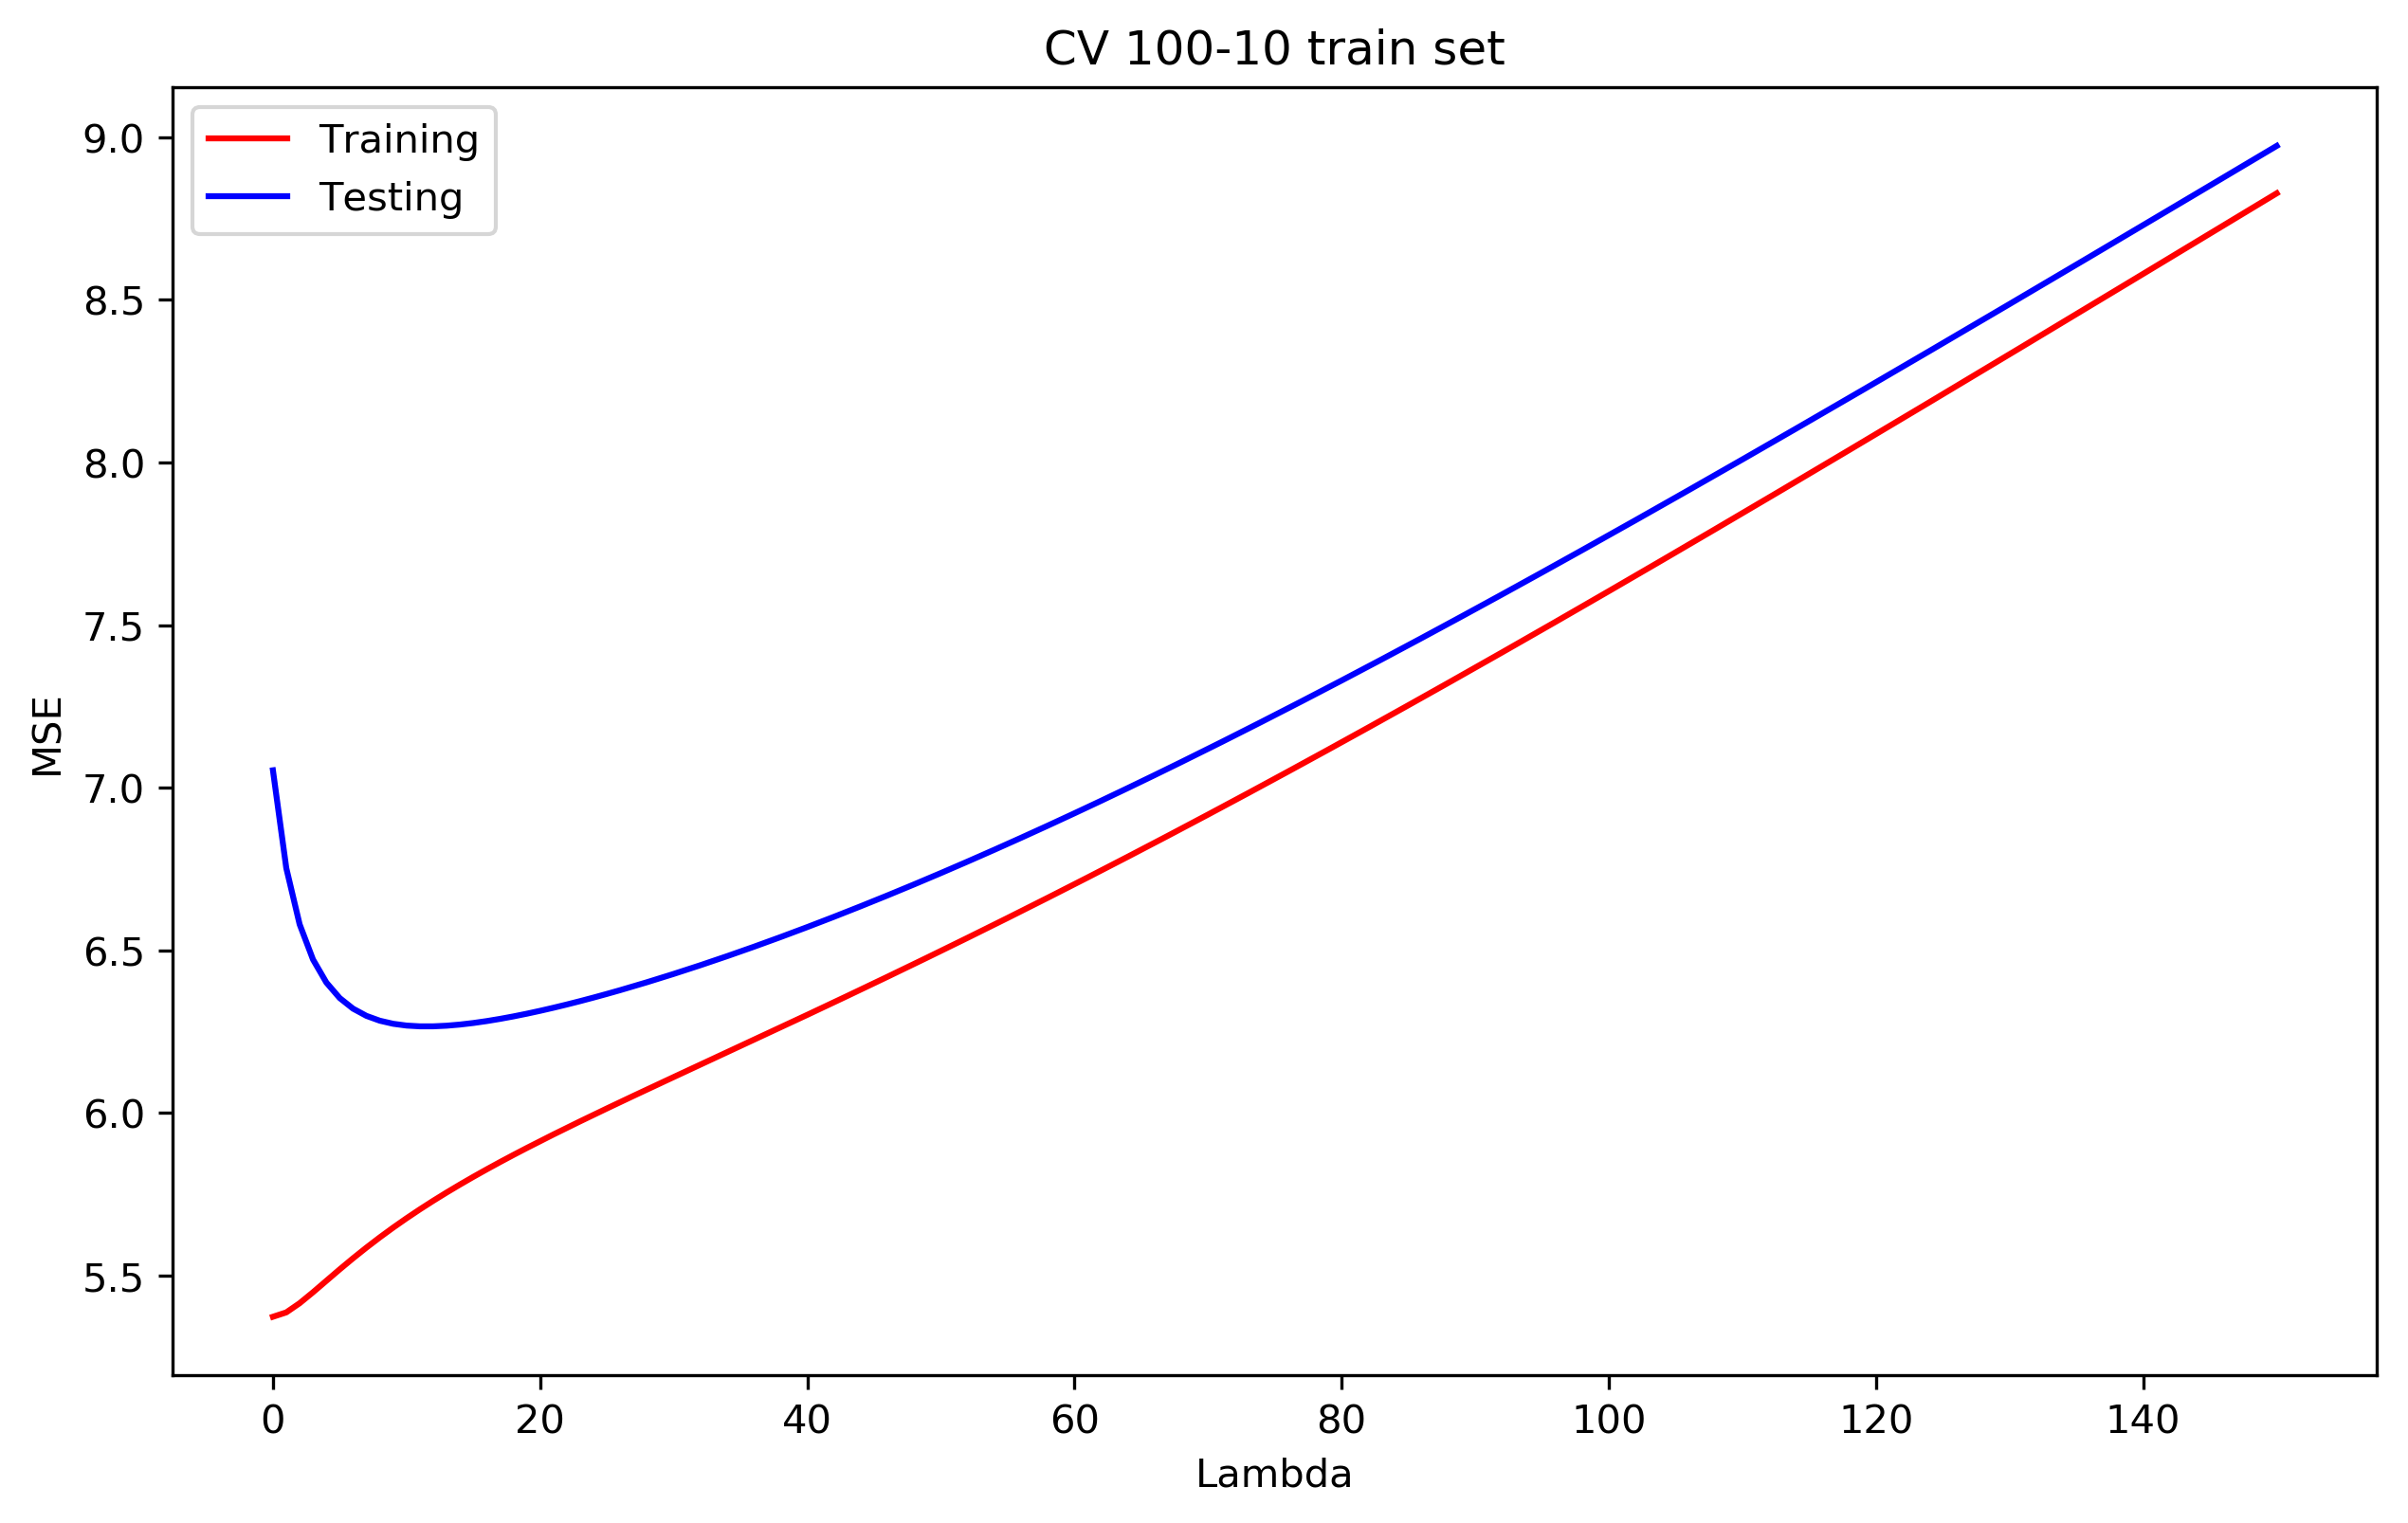

In [22]:
#set 3
cv_train3,cv_test3 = get_kfold_mse(train3,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train3)))
print('MSE_test is :{}'.format(min(cv_test3)))
print('the best λ for training in 100-10 train set is :{}'.format(cv_train3.index(min(cv_train3))))
print('the best λ for testing in 100-10 train set is :{}'.format(cv_test3.index(min(cv_test3))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train3, color = 'r', label = 'Training')
plt.plot(lam,cv_test3, color = 'b', label = 'Testing')
plt.title('CV 100-10 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE_train is :0.28711469440519927
MSE_test is :7.455510838821091
the best λ for training in 1000-100 train set is :1
the best λ for testing in 1000-100 train set is :13


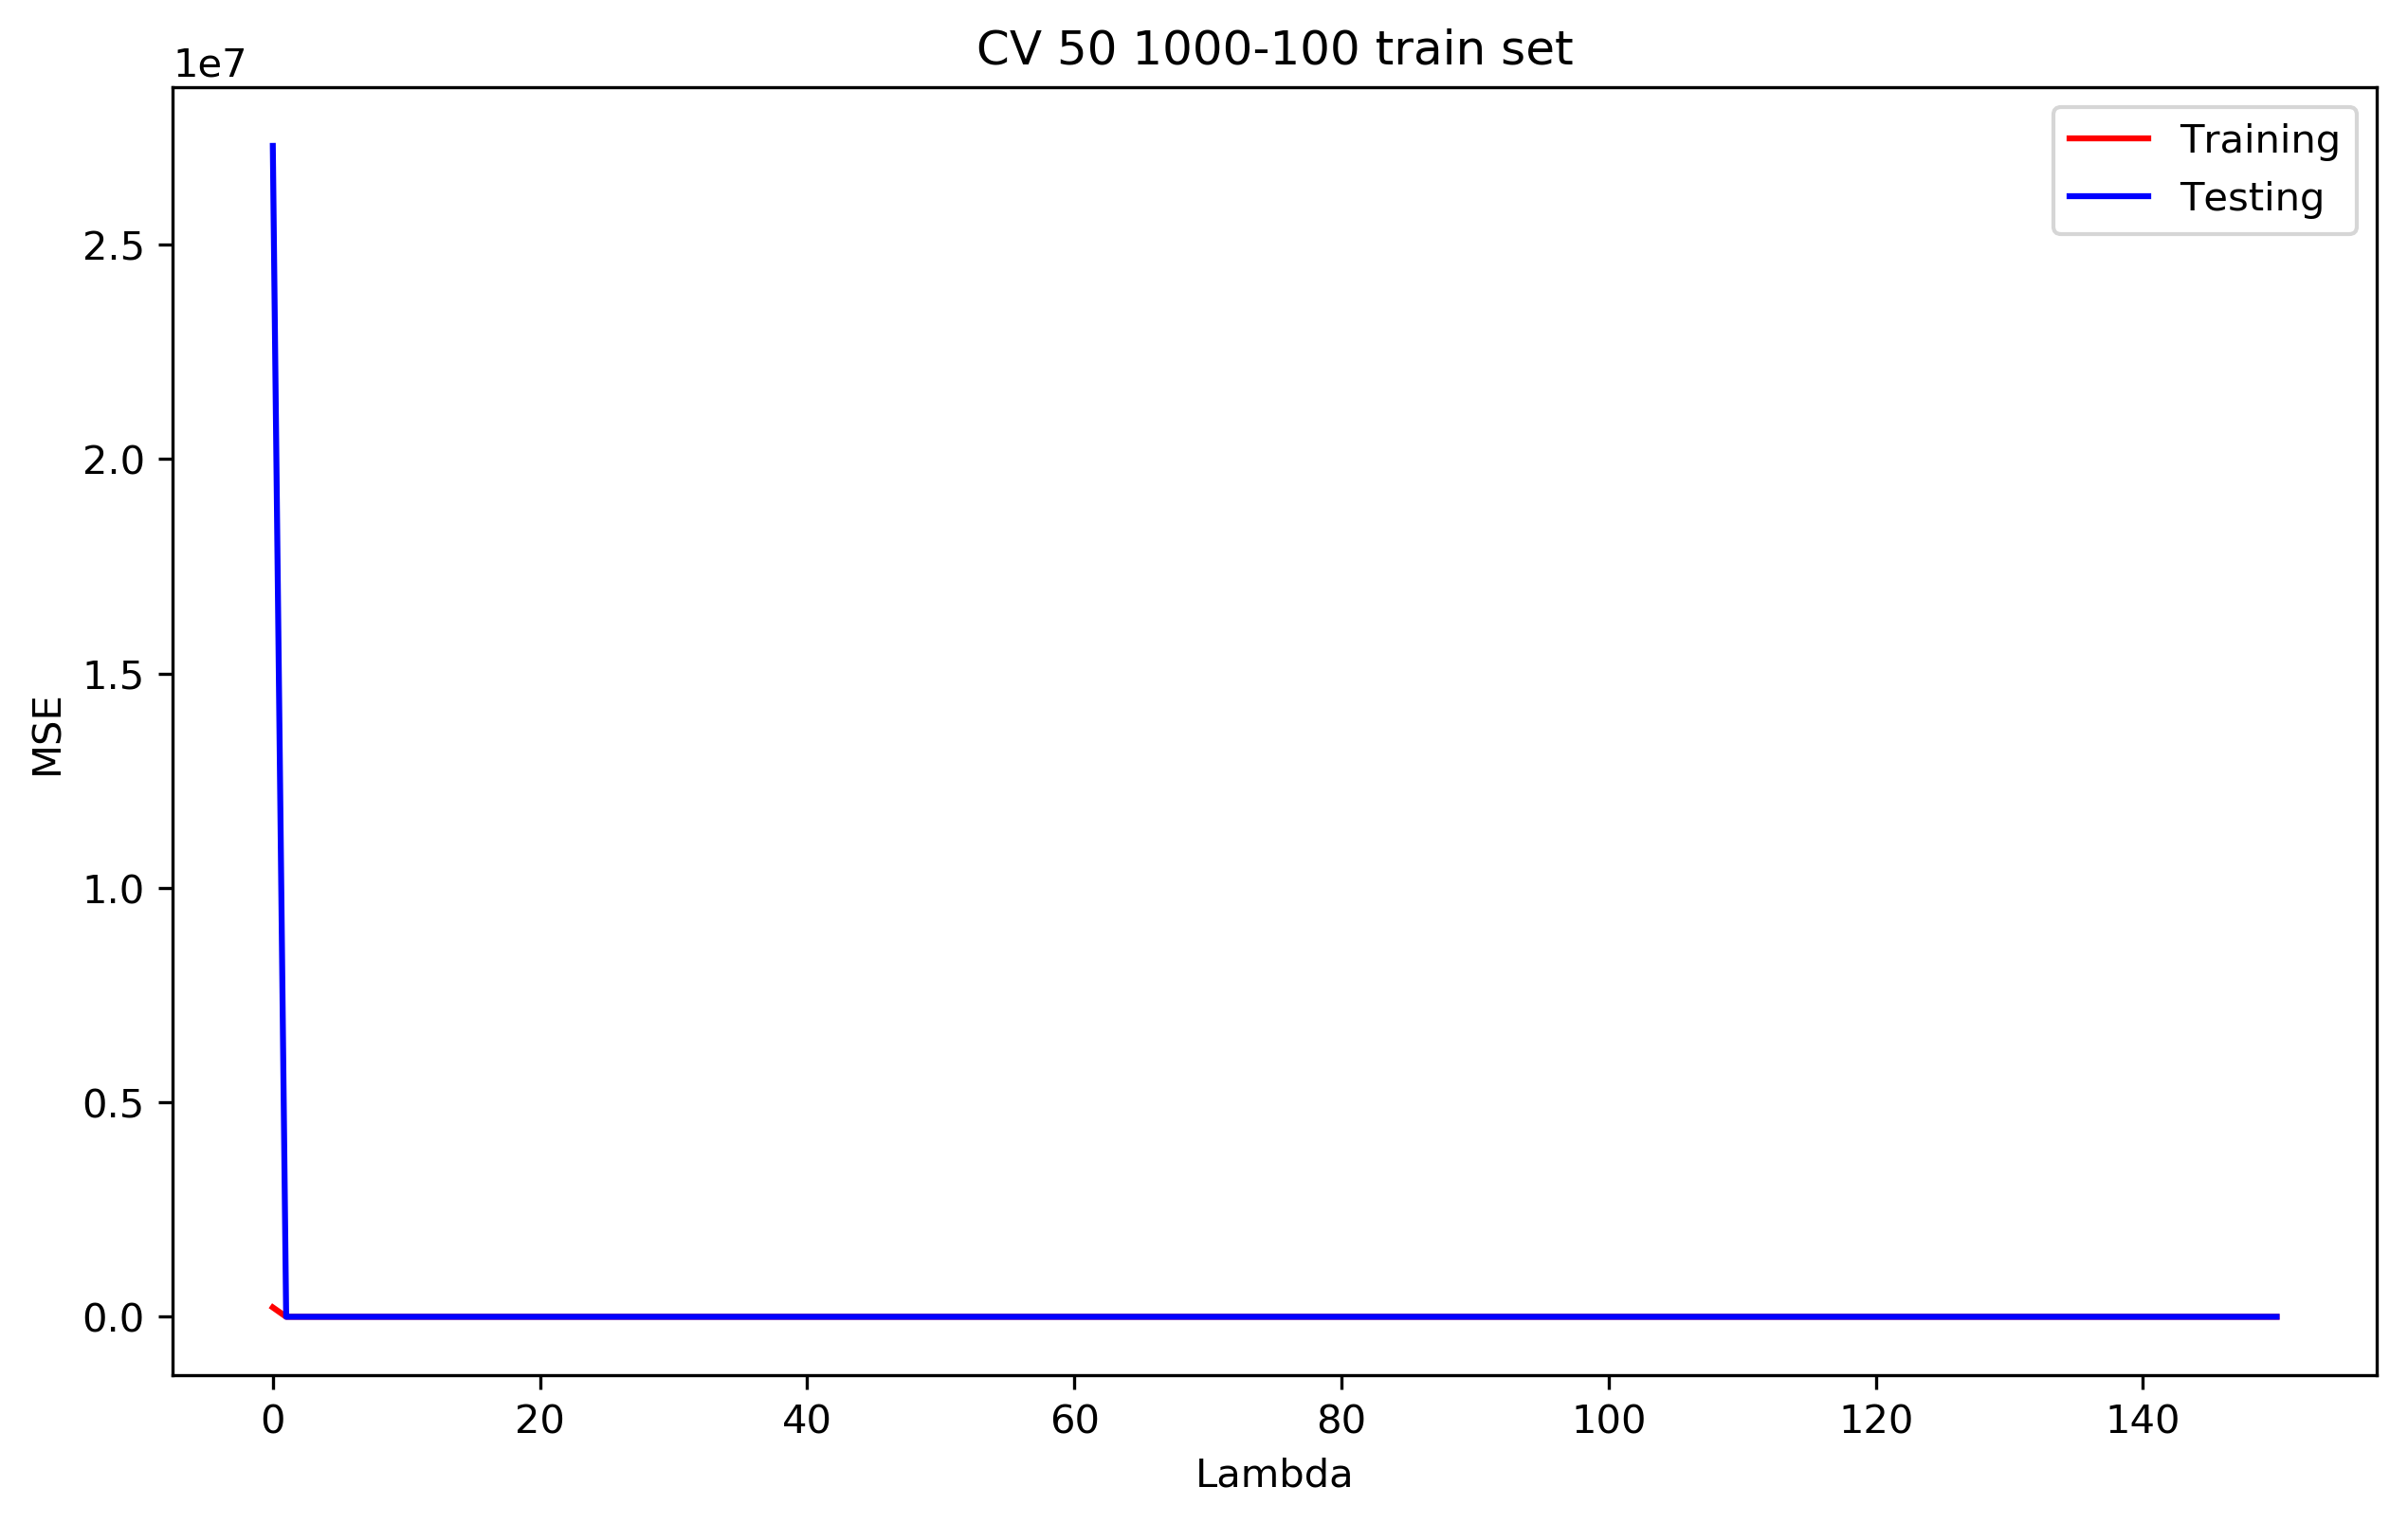

In [23]:
#set 4
cv_train4,cv_test4 = get_kfold_mse(df1,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train4)))
print('MSE_test is :{}'.format(min(cv_test4)))
print('the best λ for training in 1000-100 train set is :{}'.format(cv_train4.index(min(cv_train4))))
print('the best λ for testing in 1000-100 train set is :{}'.format(cv_test4.index(min(cv_test4))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train4, color = 'r', label = 'Training')
plt.plot(lam,cv_test4, color = 'b', label = 'Testing')
plt.title('CV 50 1000-100 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE_train is :0.6622087218213853
MSE_test is :5.8878657782031425
the best λ for training in 100 1000-100 train set is :1
the best λ for testing in 100 1000-100 train set is :15


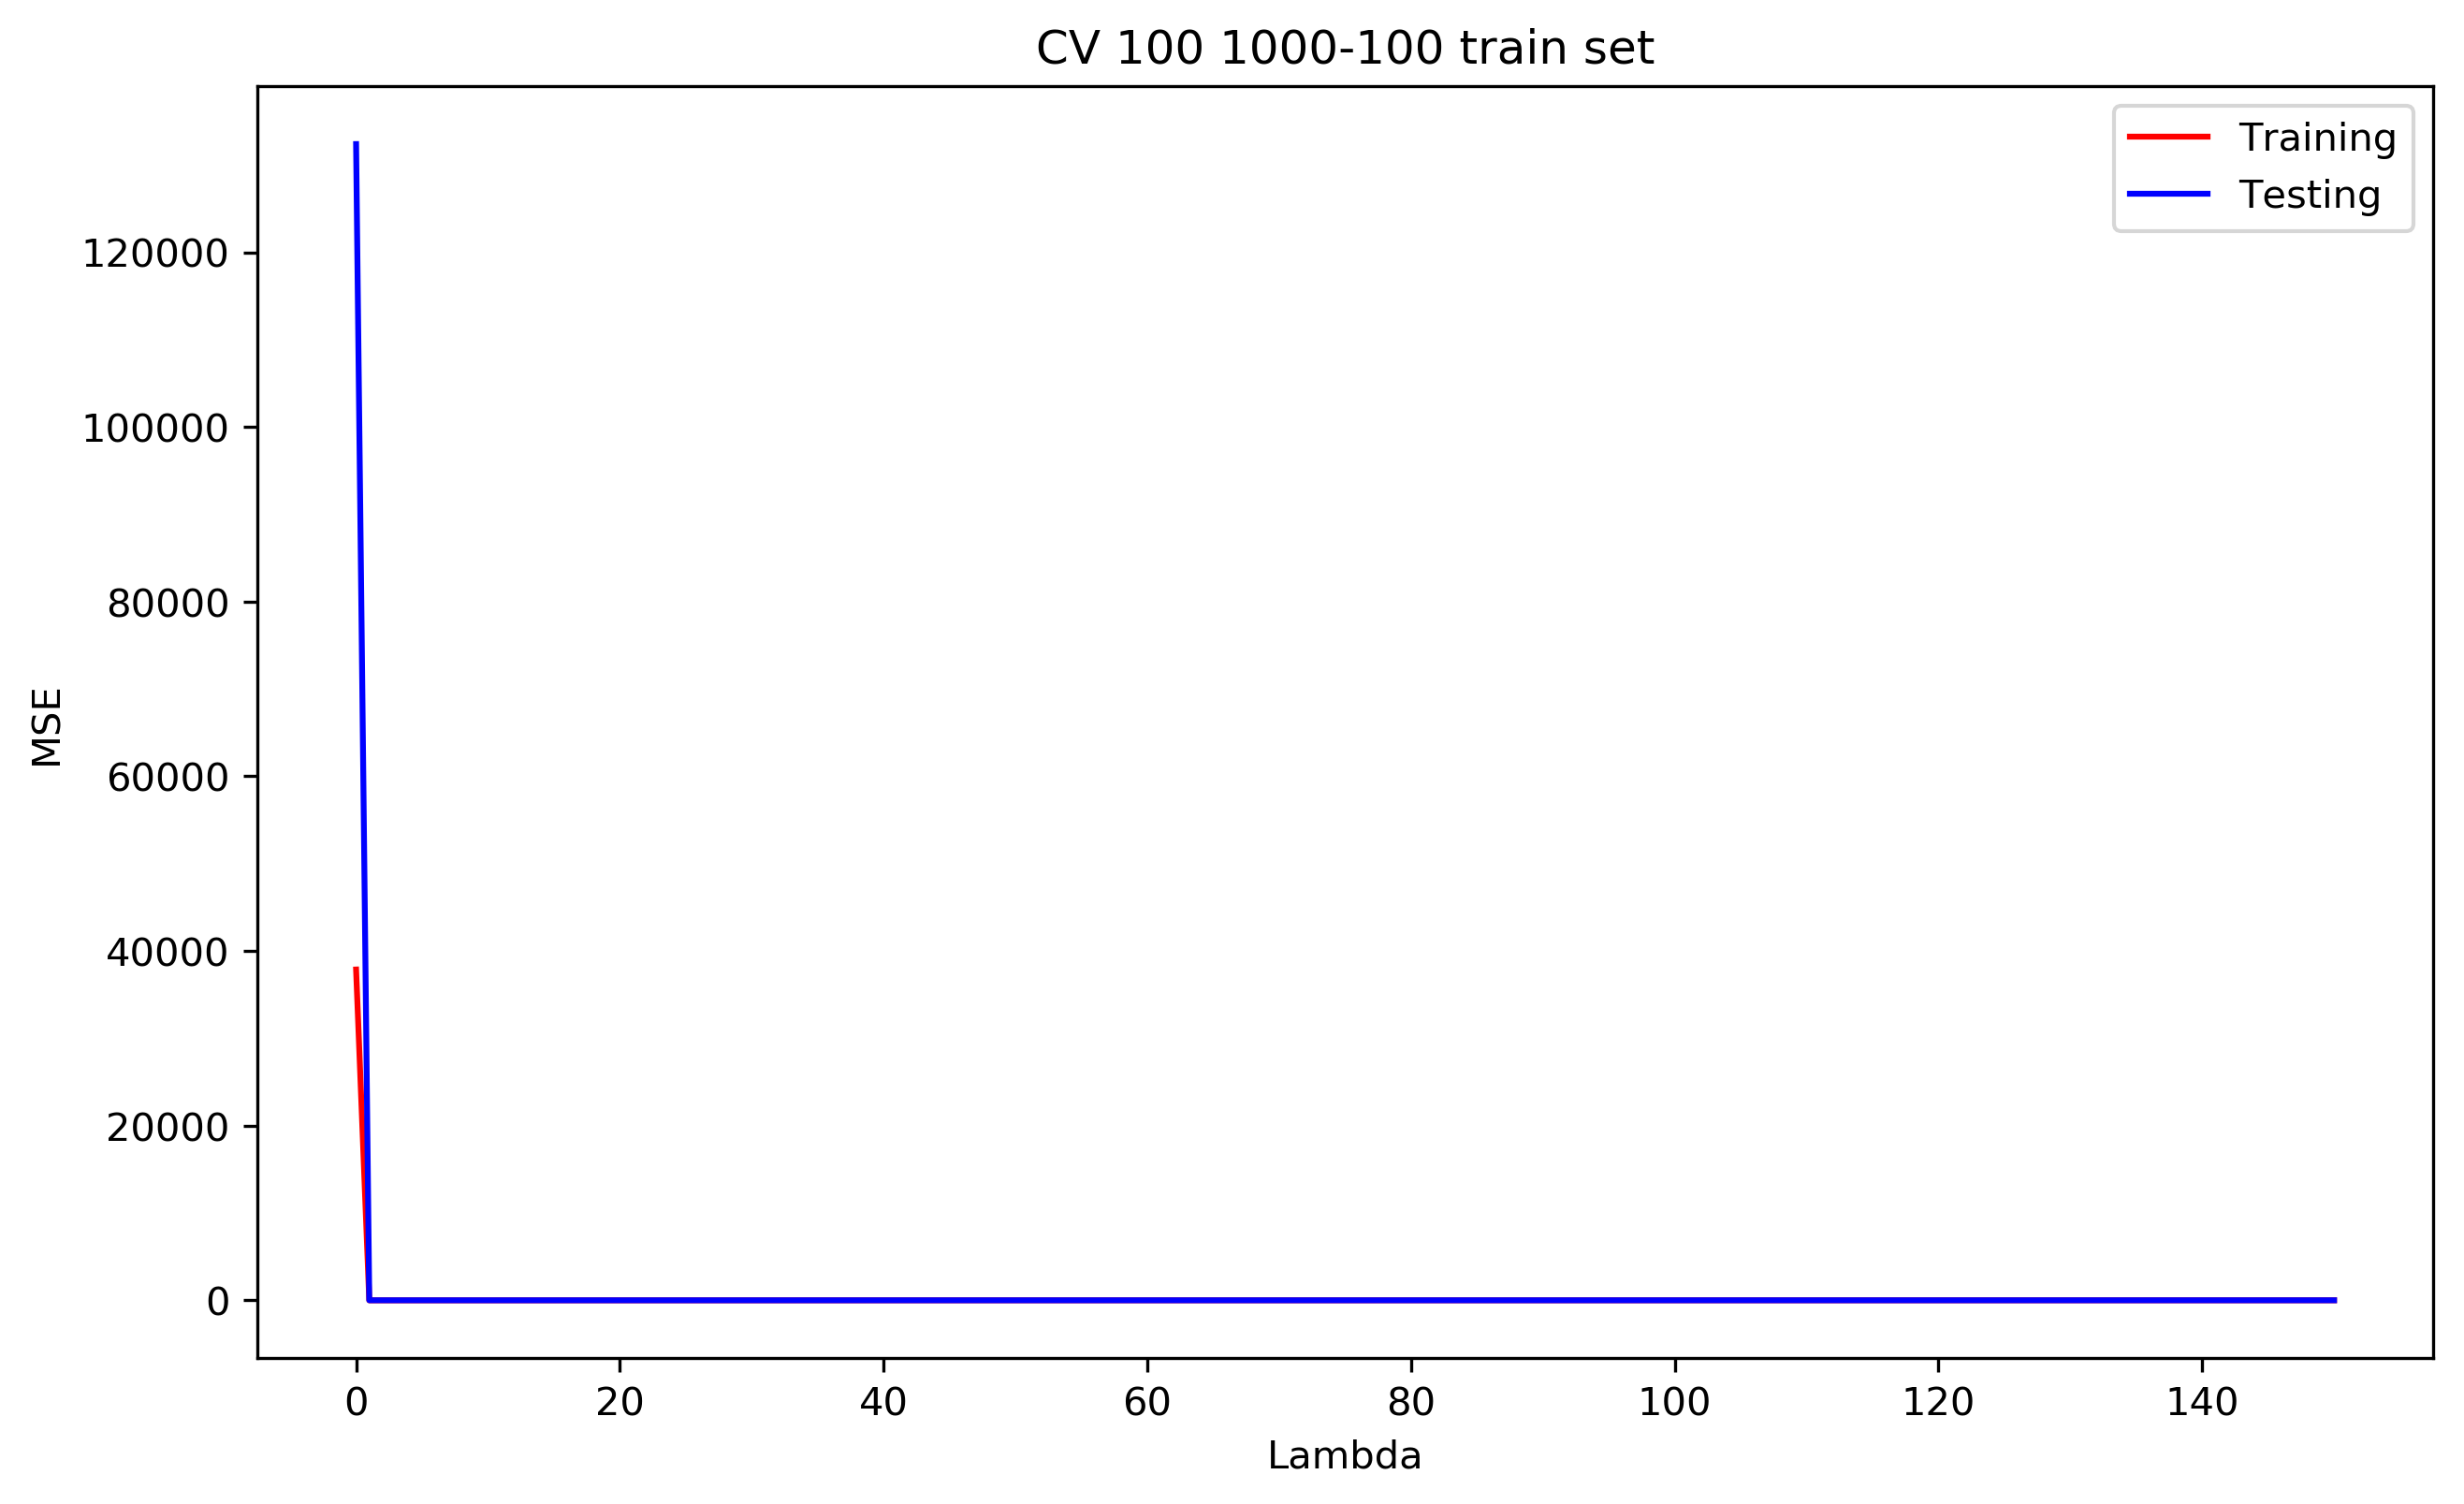

In [24]:
#set 5
cv_train5,cv_test5 = get_kfold_mse(df2,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train5)))
print('MSE_test is :{}'.format(min(cv_test5)))
print('the best λ for training in 100 1000-100 train set is :{}'.format(cv_train5.index(min(cv_train5))))
print('the best λ for testing in 100 1000-100 train set is :{}'.format(cv_test5.index(min(cv_test5))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train5, color = 'r', label = 'Training')
plt.plot(lam,cv_test5, color = 'b', label = 'Testing')
plt.title('CV 100 1000-100 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE_train is :0.28711469440519927
MSE_test is :7.455510838821091
the best λ for training in 150 1000-100 train set is :0
the best λ for testing in 150 1000-100 train set is :38


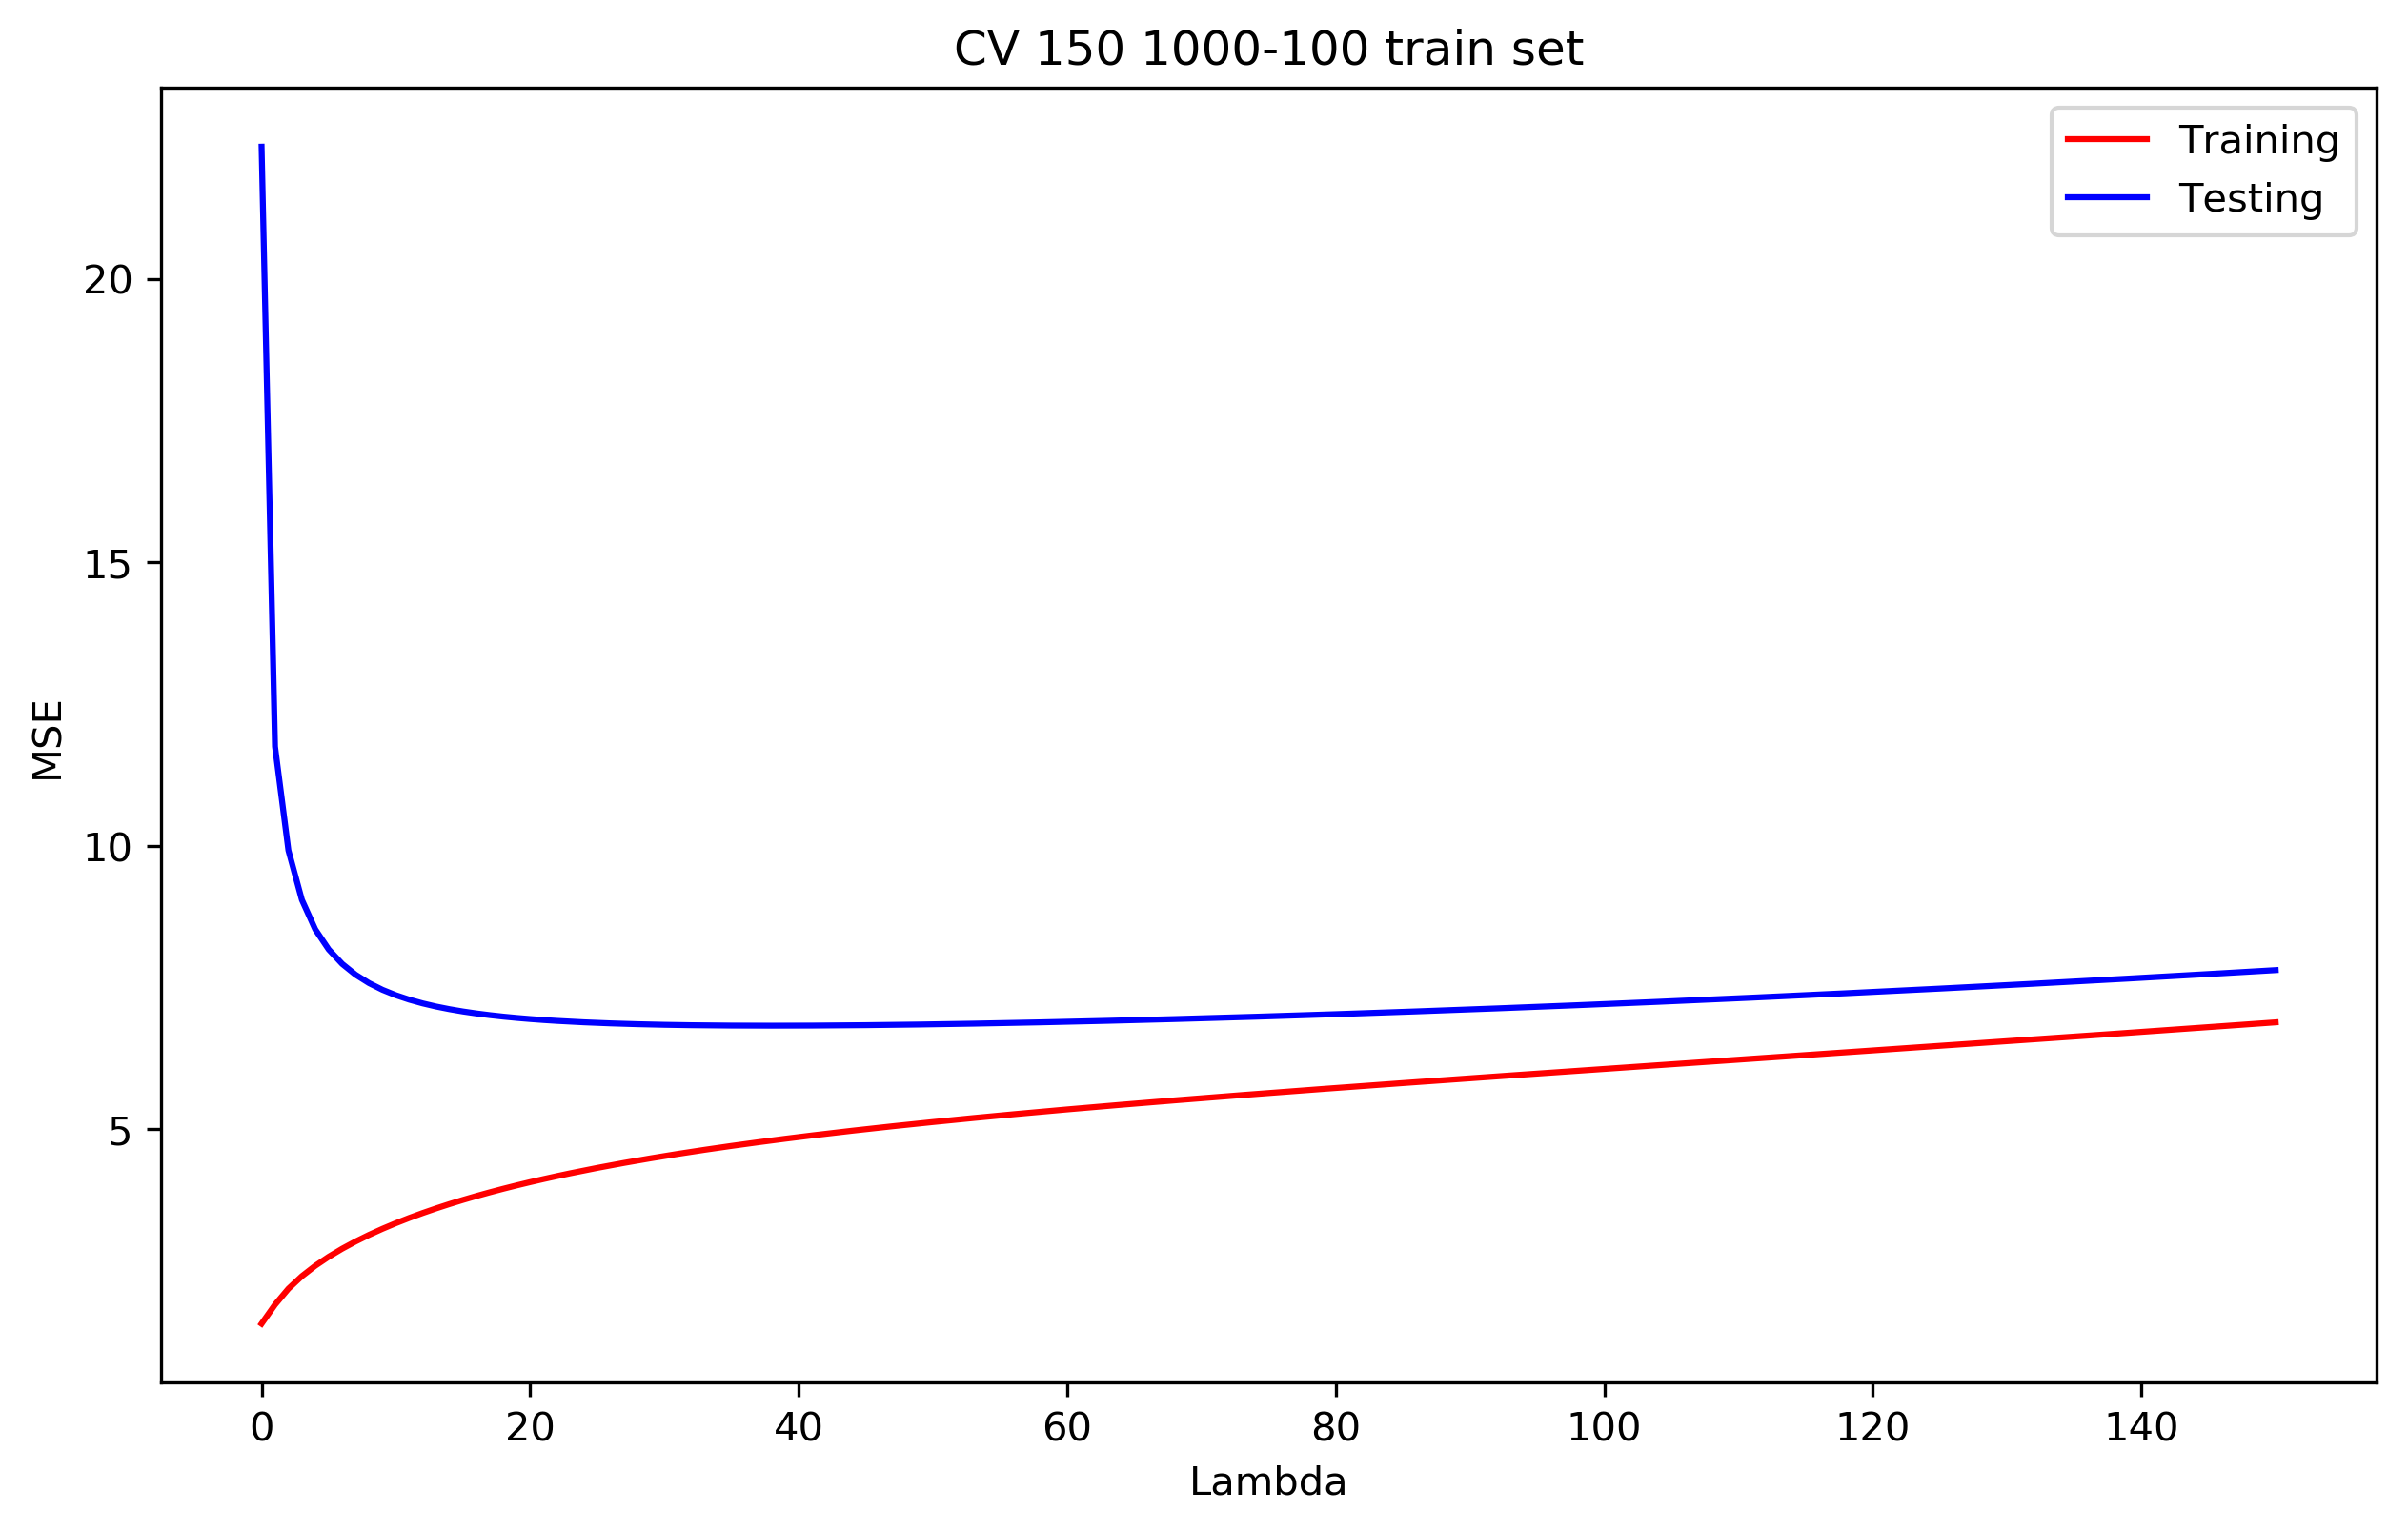

In [25]:
#set 6
cv_train6,cv_test6 = get_kfold_mse(df3,lamda_ = 151,n = 10)
print('MSE_train is :{}'.format(min(cv_train4)))
print('MSE_test is :{}'.format(min(cv_test4)))
print('the best λ for training in 150 1000-100 train set is :{}'.format(cv_train6.index(min(cv_train6))))
print('the best λ for testing in 150 1000-100 train set is :{}'.format(cv_test6.index(min(cv_test6))))
plt.figure(figsize = (10,6),dpi = 300)
plt.plot(lam,cv_train6, color = 'r', label = 'Training')
plt.plot(lam,cv_test6, color = 'b', label = 'Testing')
plt.title('CV 150 1000-100 train set')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Q3**

In [26]:
#define function for getting the set of MSE 
def get_learning_MSE_set(xtrain,ytrain,xtest,ytest,number):
    w = np.dot(np.linalg.inv(xtrain.T.dot(xtrain) + number*np.eye(xtrain.shape[1])),xtrain.T).dot(ytrain)
    mse_train = ((xtrain.dot(w) - ytrain)**2).mean()
    mse_test = ((xtest.dot(w) - ytest)**2).mean()
    return mse_train,mse_test

In [27]:
def get_learning_curve(train,test,lamda_=[1,25,150],time = 10):
    MSE_train = []
    MSE_test = []
    s = list(range(1,train.shape[0]+1))
    for l in lamda_:
        Mse_train = []
        Mse_test = []
        for datapoint in range(1,train.shape[0]+1):
            mse_train = []
            mse_test = []
            for t in range(time):
                df = train.sample(datapoint)
                X_train = df.drop('y', axis = 1).values
                y_train = df['y'].values.reshape(-1,1)
                train_1,test_1 = get_learning_MSE_set(X_train,y_train,Xtest1,ytest1,l)
                mse_train.append(train_1)
                mse_test.append(test_1)
            Mse_train.append(np.mean(mse_train))
            Mse_test.append(np.mean(mse_test))
        MSE_train.append(Mse_train)
        MSE_test.append(Mse_test)
    for n in range(len(lamda_)):
        plt.figure(figsize = (10,6),dpi = 300)
        plt.plot(s,MSE_train[n], color = 'r', label = 'Training')
        plt.plot(s,MSE_test[n], color = 'b', label = 'Testing')
        plt.title('Learning Curve λ = ')
        plt.xlabel('Number of data')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()


In [ ]:
get_learning_curve(train1,test1)